In [4]:

import file_reader 
import data_processing as dp
import data_visualization
%reload_ext autoreload
%autoreload 2

# Process data

read in data from a specific file

or all files from a from a directory

In [2]:
functionalisations, data = file_reader.read_all_files_in_folder('data')

In [5]:
measurements_per_file = {}
for file in data:
    measurements_per_file[file] = dp.get_labeled_measurements(data[file])

In [8]:
measurements = []
for file in measurements_per_file:
    print("file: ",file)
    adding = dp.standardize_measurements_2(measurements_per_file[file])
    if adding is not None:
        measurements.extend(adding)

print(len(measurements))

file:  data/data_wodka_orange_juice_red_wine_lemon_juice_coffee_garlic_10_loops_for_10.0_min_2020-01-03_11-08.csv
null
wodka
null
orange_juice
null
red_wine
null
lemon_juice
null
coffee
null
garlic
null
wodka
null
orange_juice
null
red_wine
null
lemon_juice
null
coffee
null
garlic
null
wodka
null
orange_juice
null
red_wine
null
lemon_juice
null
coffee
null
garlic
null
wodka
null
orange_juice
null
red_wine
null
lemon_juice
null
coffee
null
garlic
null
wodka
null
orange_juice
null
red_wine
null
lemon_juice
null
coffee
null
garlic
null
wodka
null
orange_juice
null
red_wine
null
lemon_juice
null
coffee
null
garlic
null
wodka
null
orange_juice
null
red_wine
null
lemon_juice
null
coffee
null
garlic
null
wodka
null
orange_juice
null
red_wine
null
lemon_juice
null
coffee
null
garlic
null
wodka
null
orange_juice
null
red_wine
null
lemon_juice
null
coffee
null
garlic
null
wodka
null
orange_juice
null
red_wine
null
lemon_juice
null
coffee
null
garlic
null
60


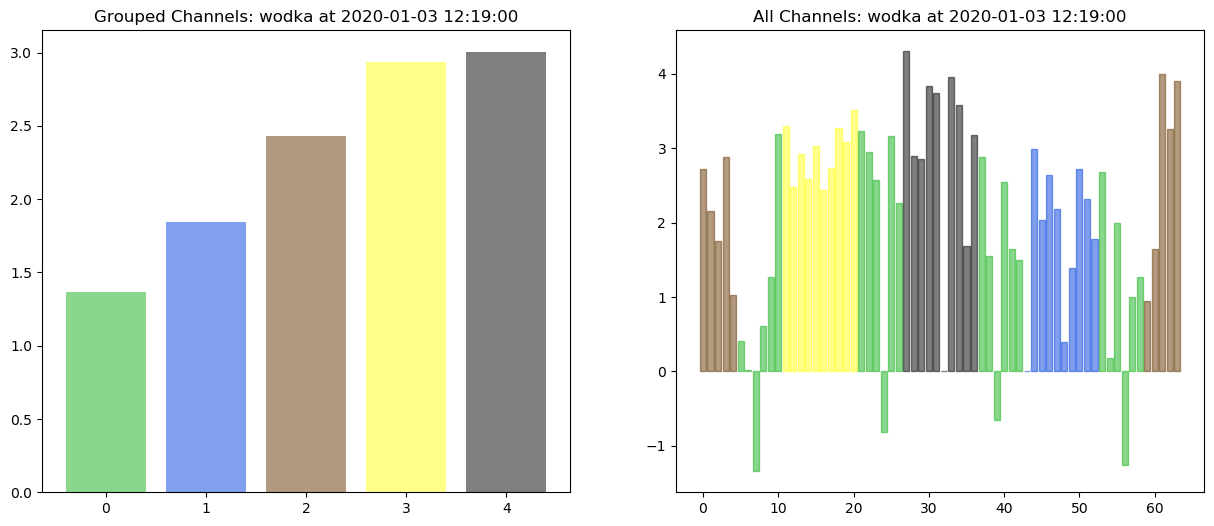

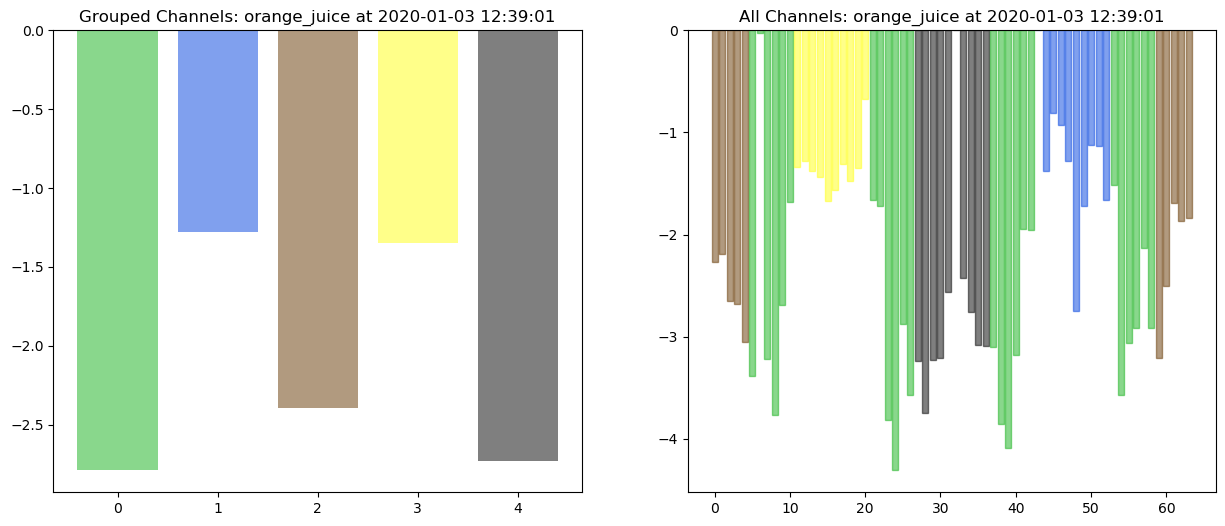

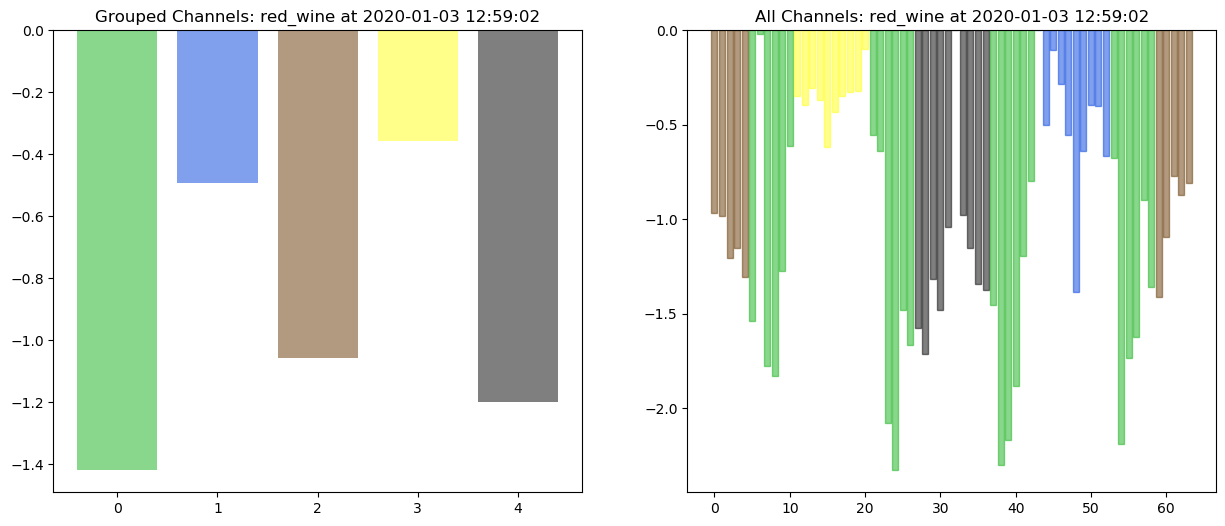

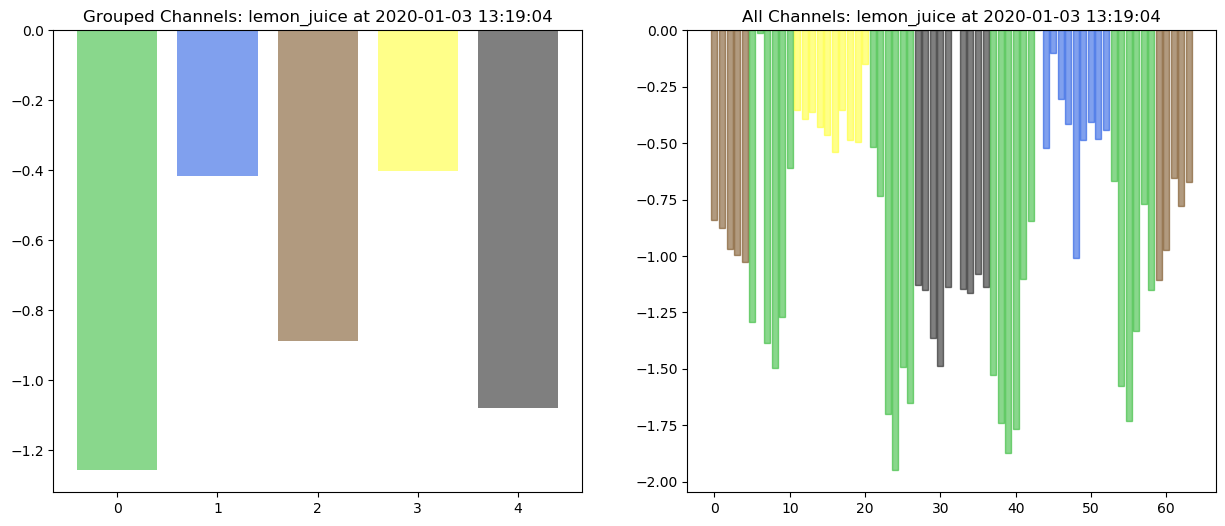

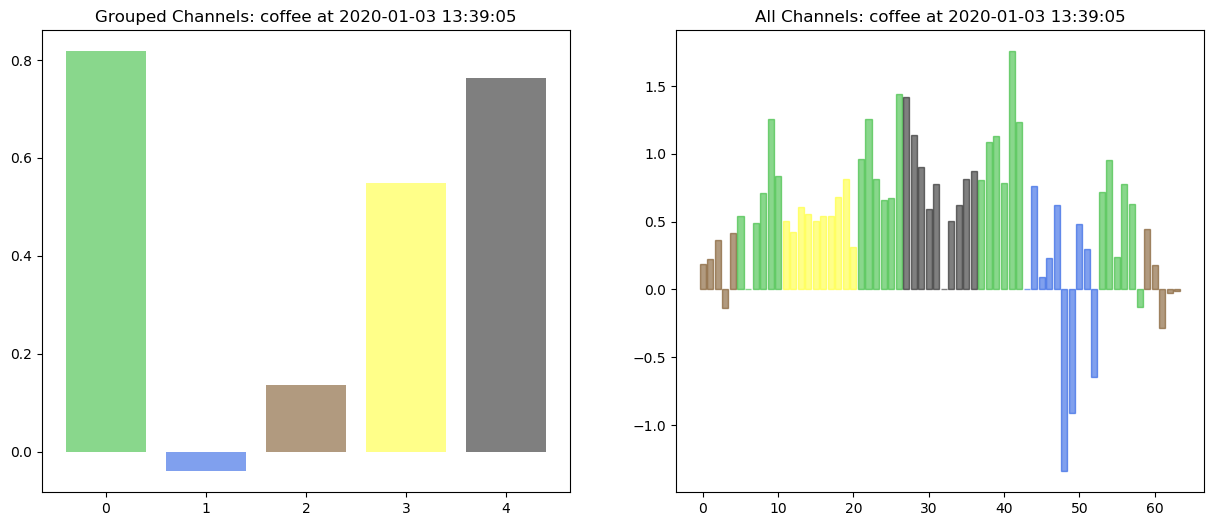

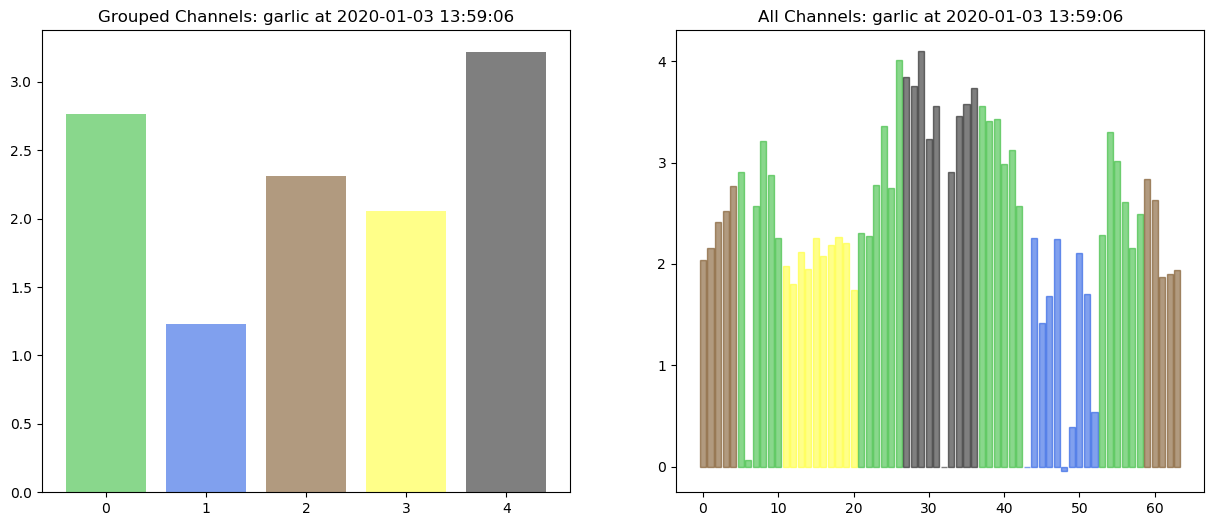

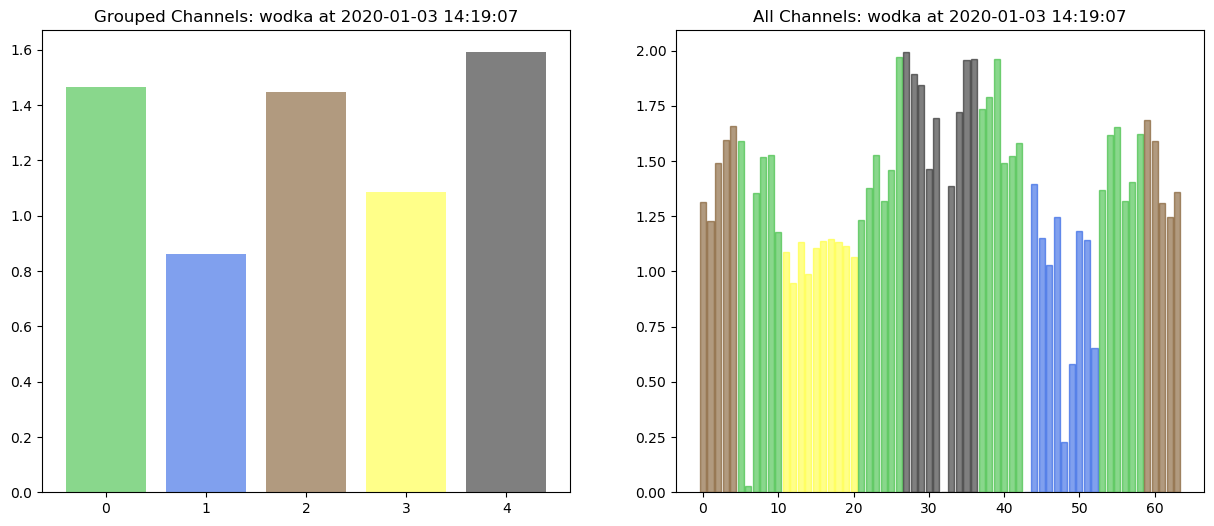

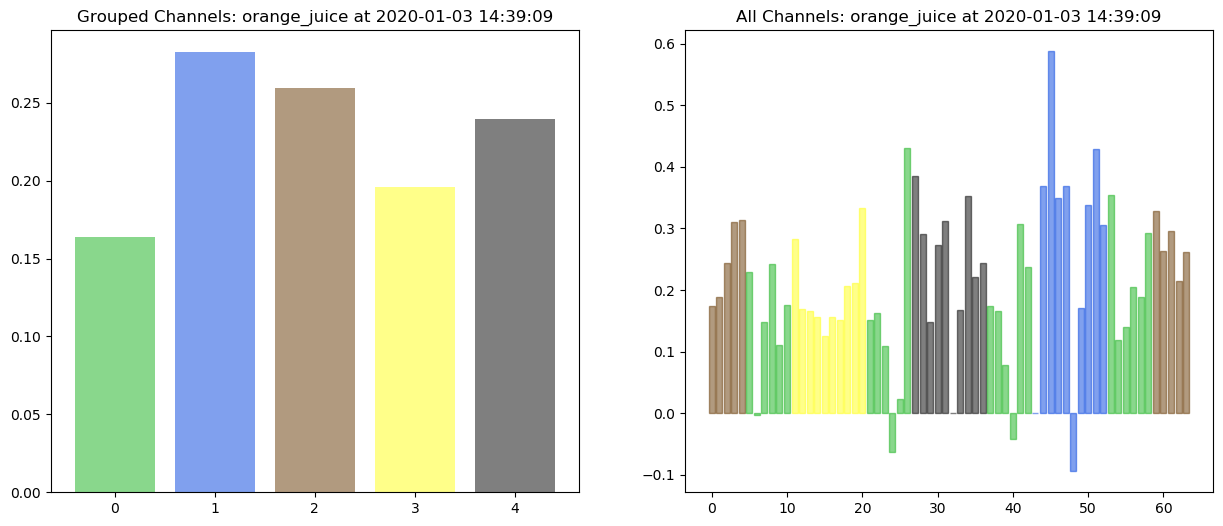

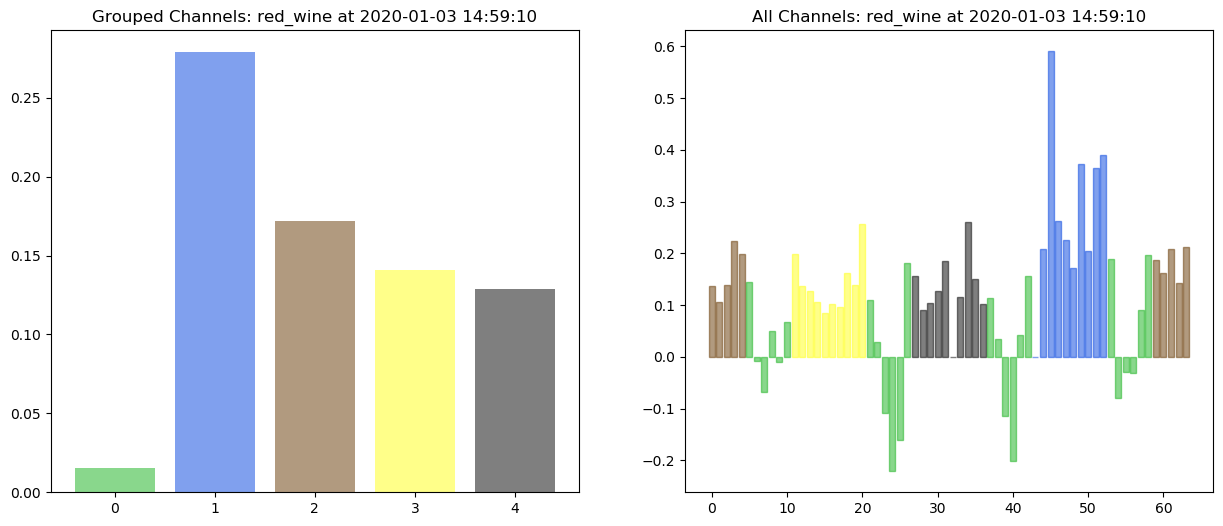

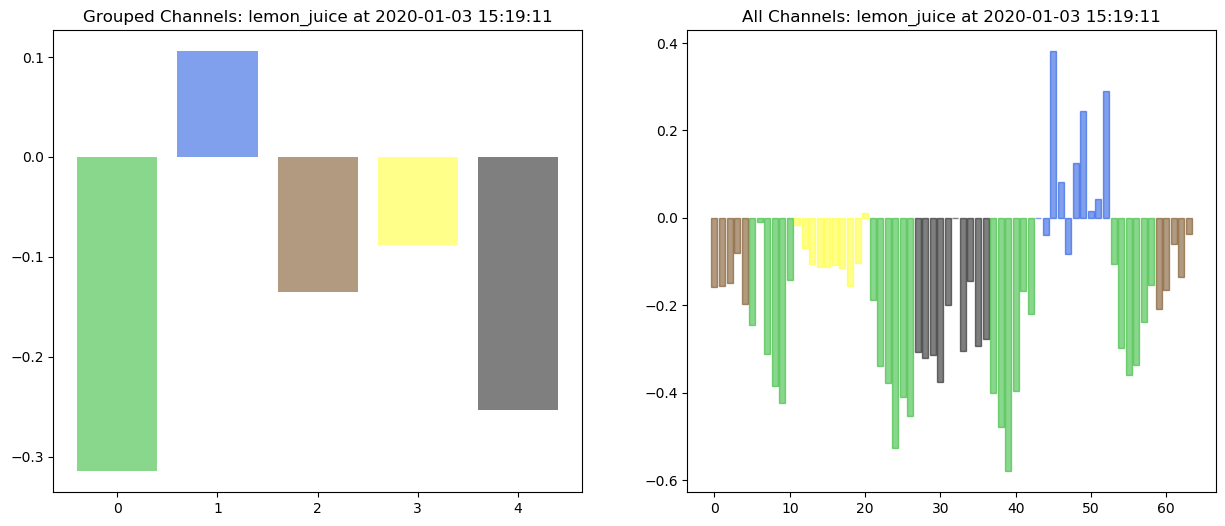

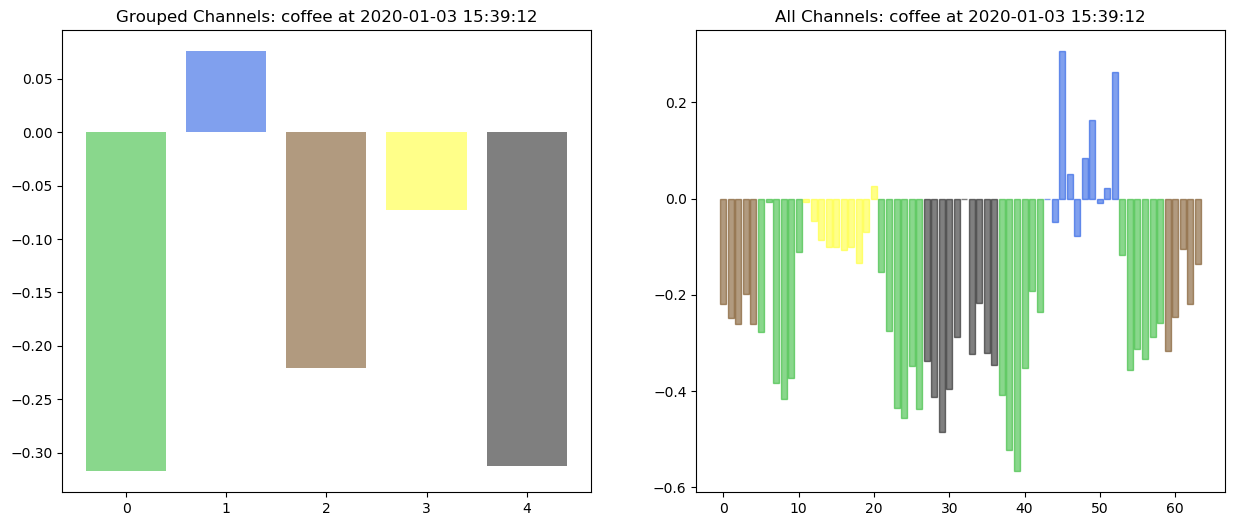

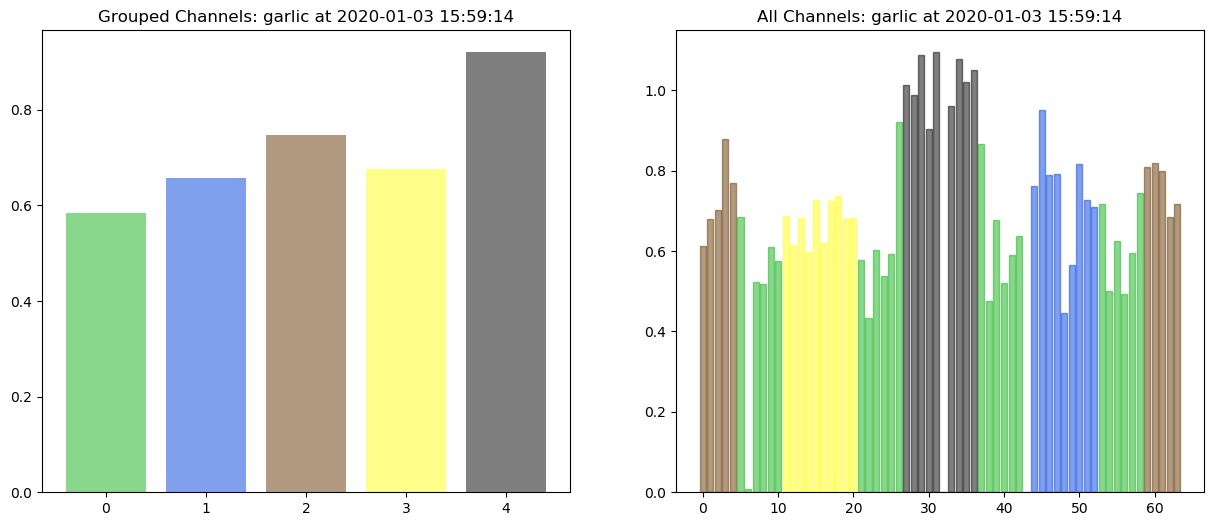

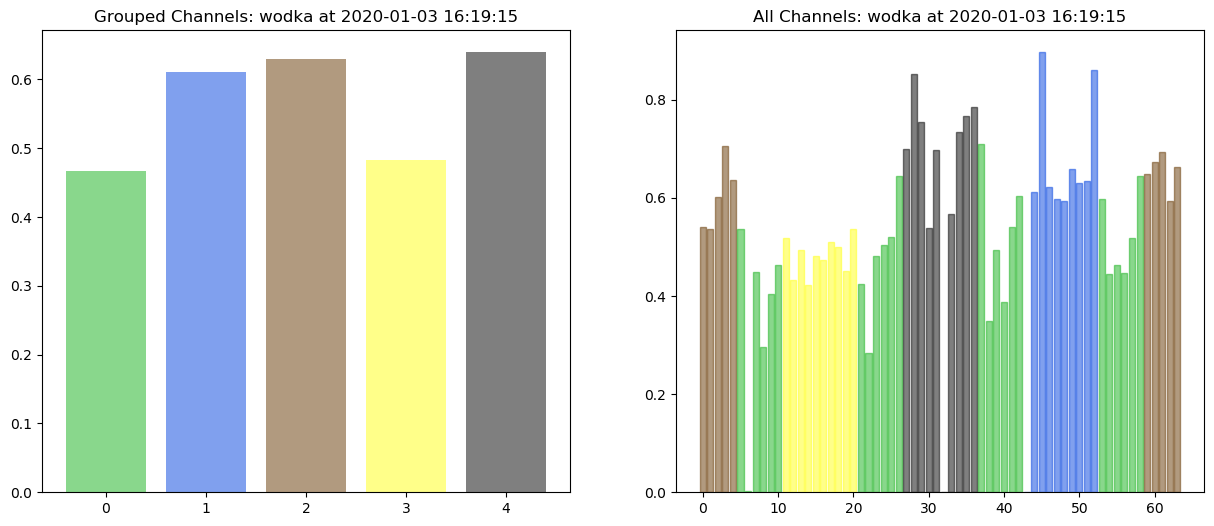

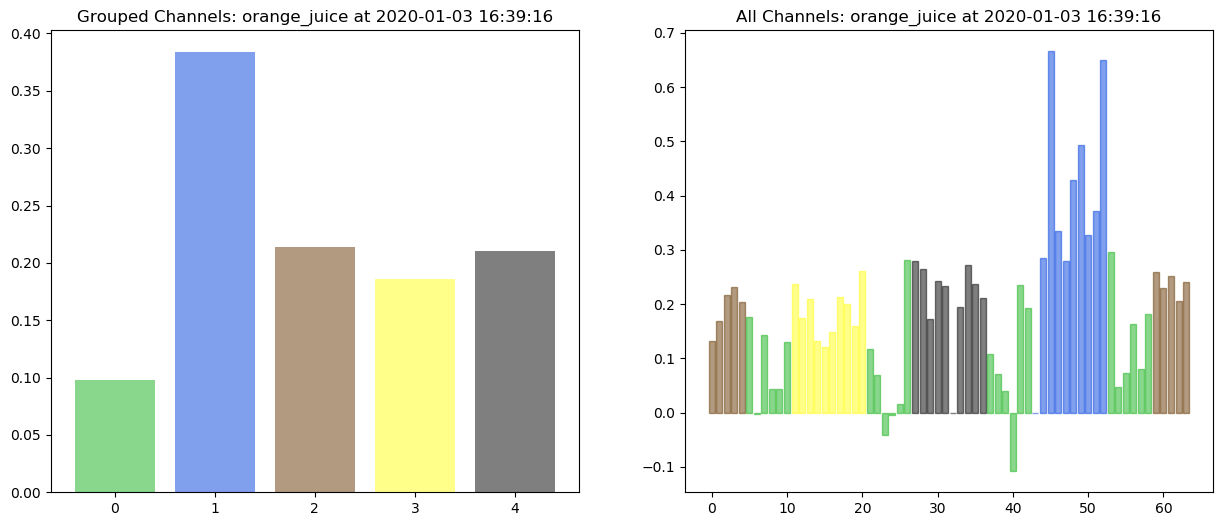

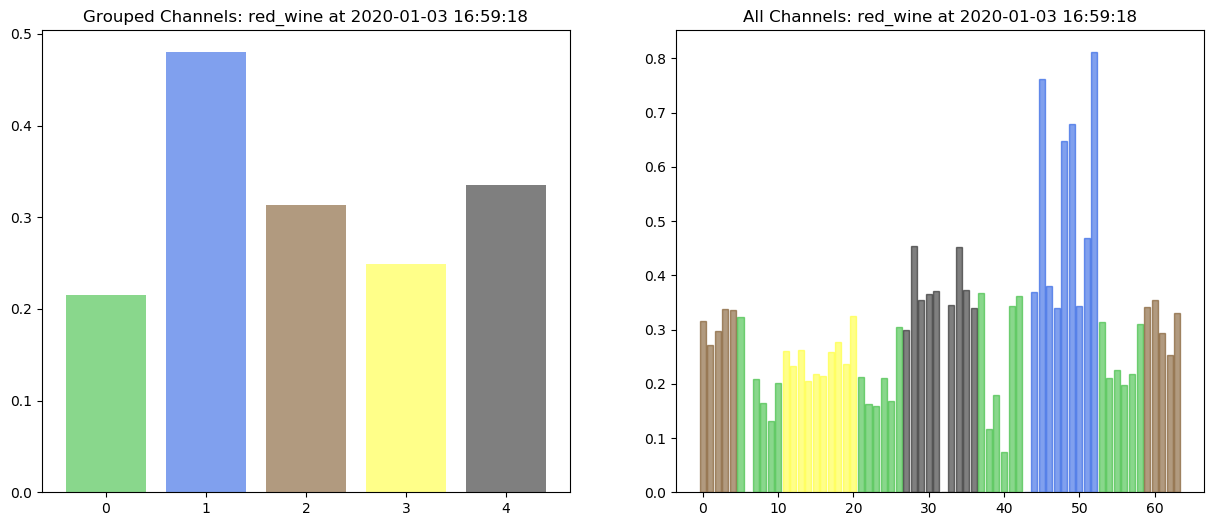

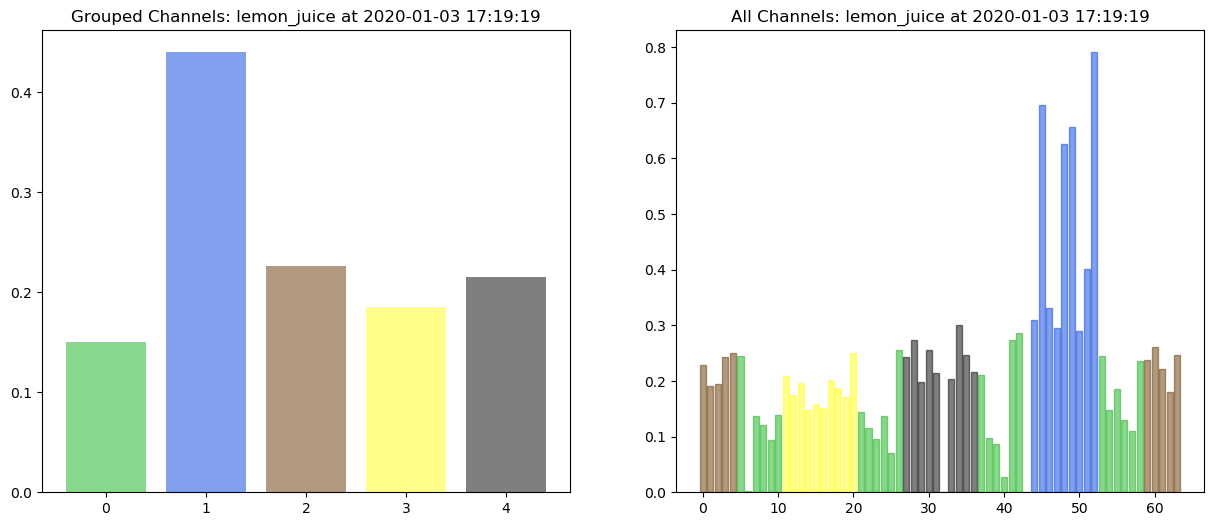

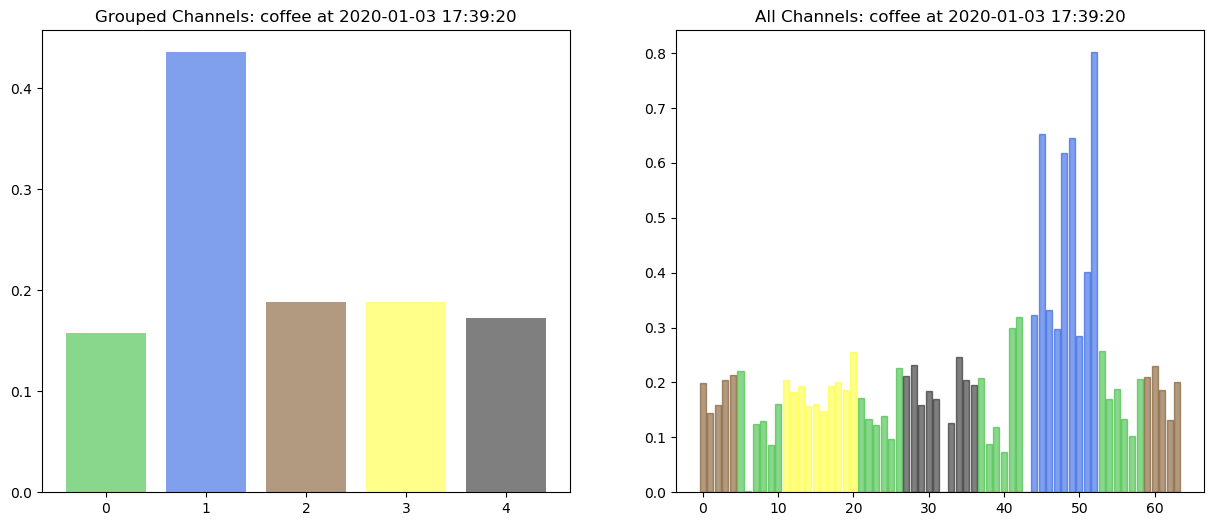

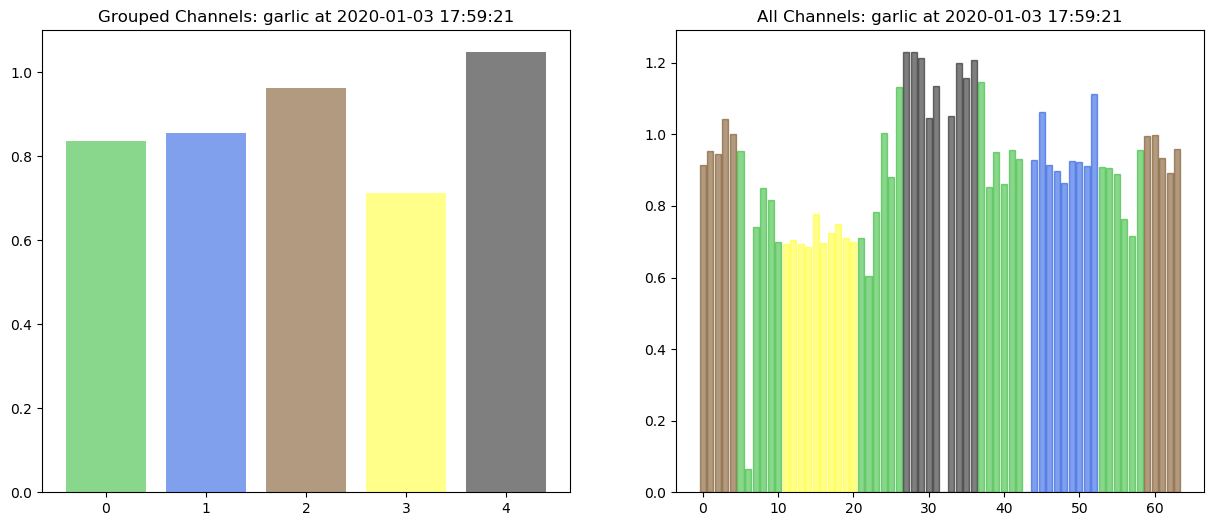

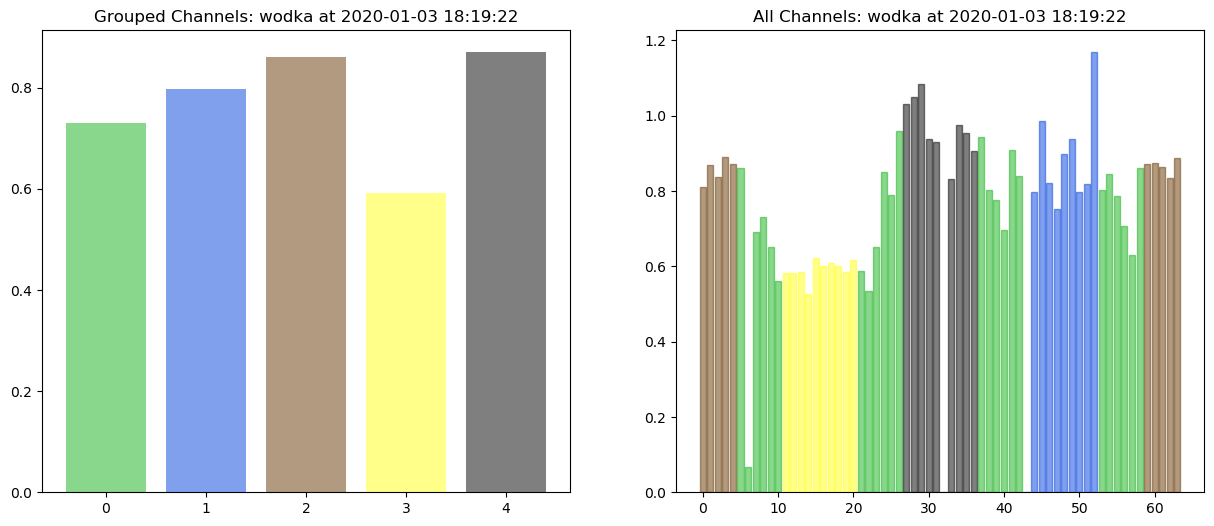

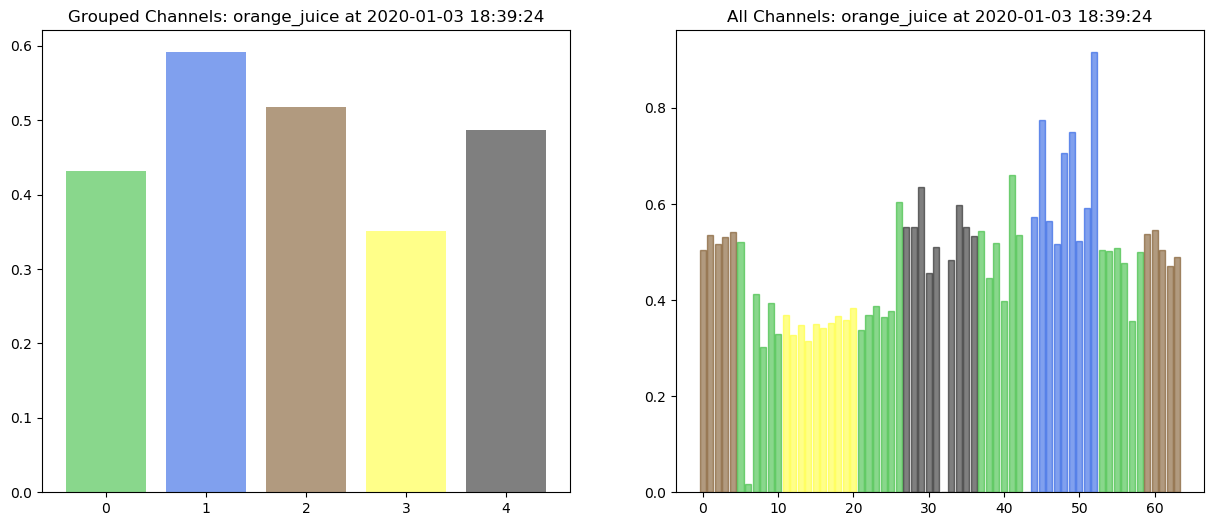

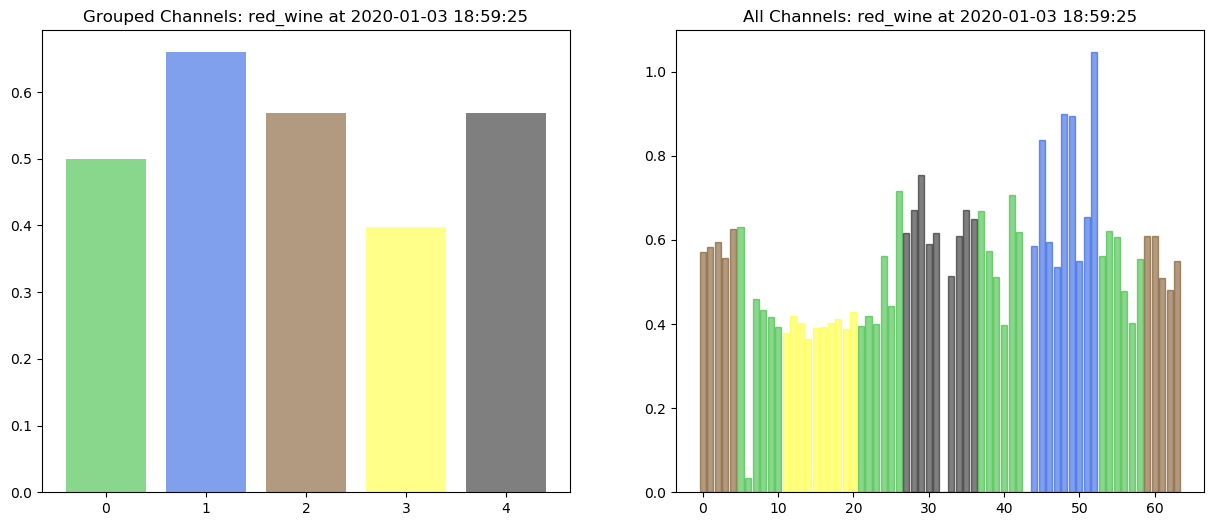

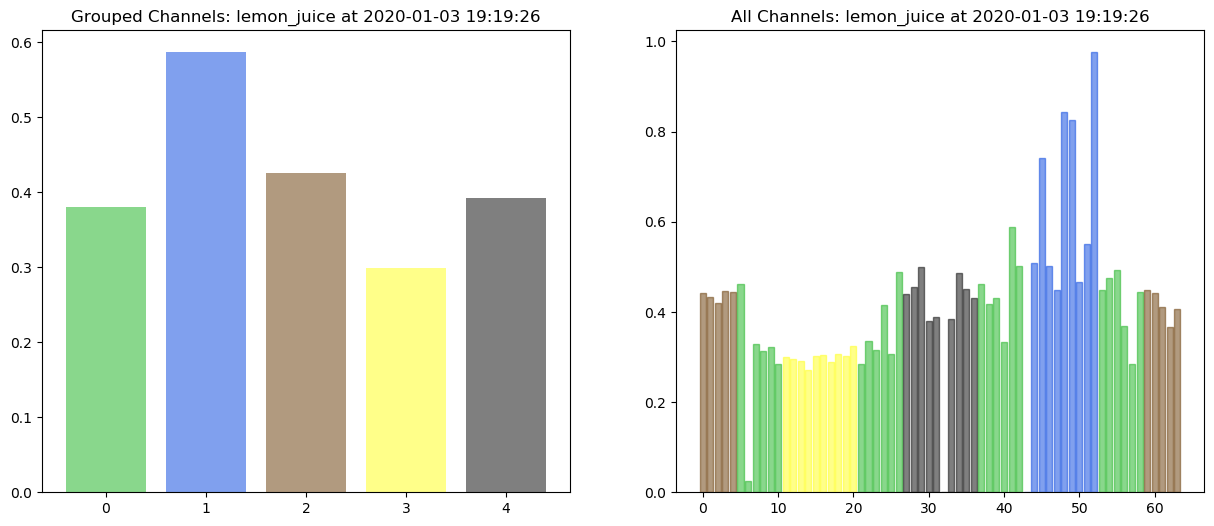

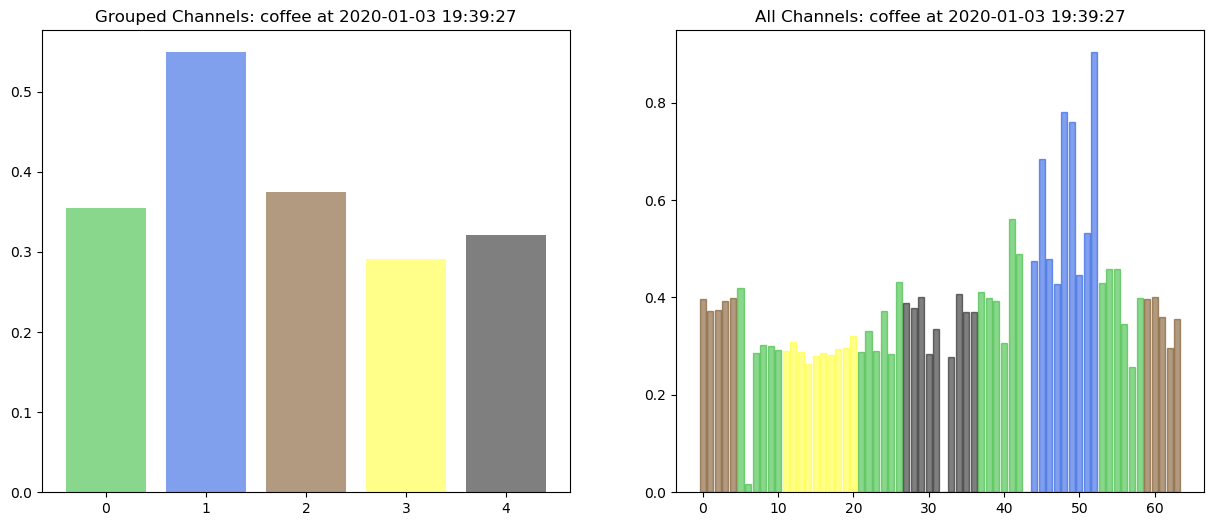

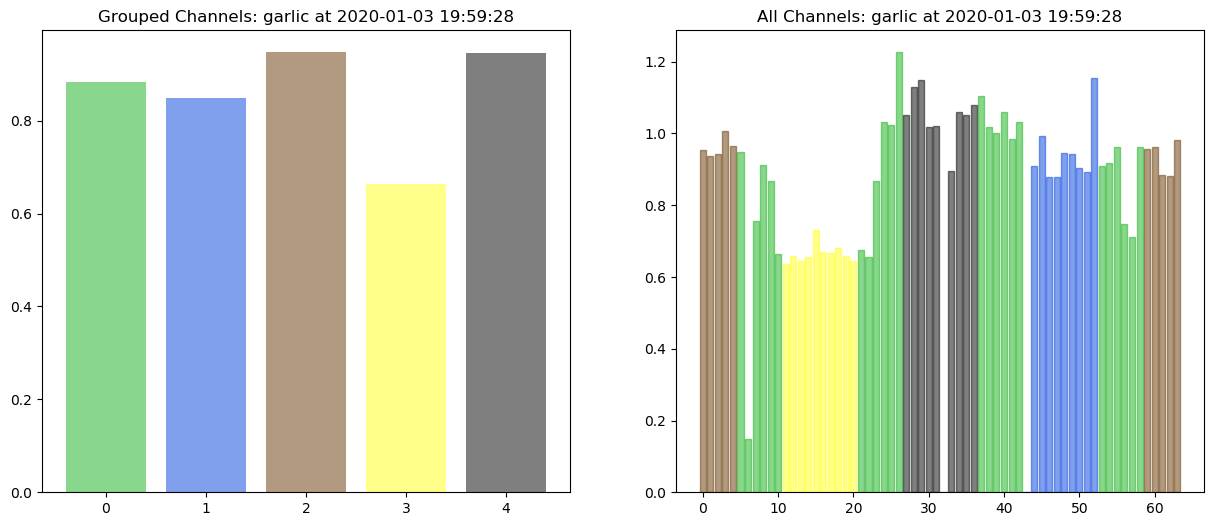

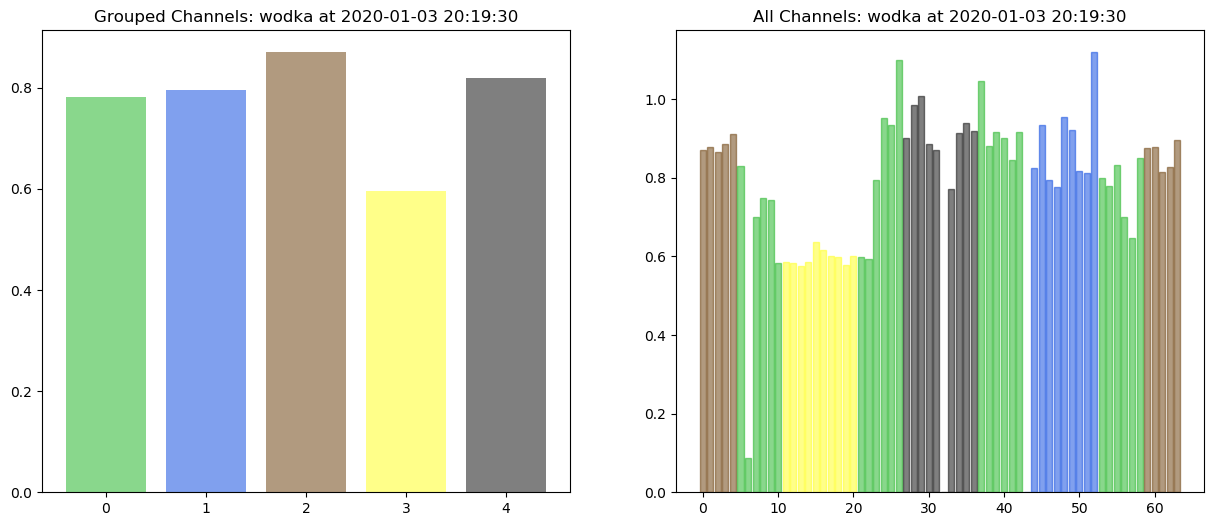

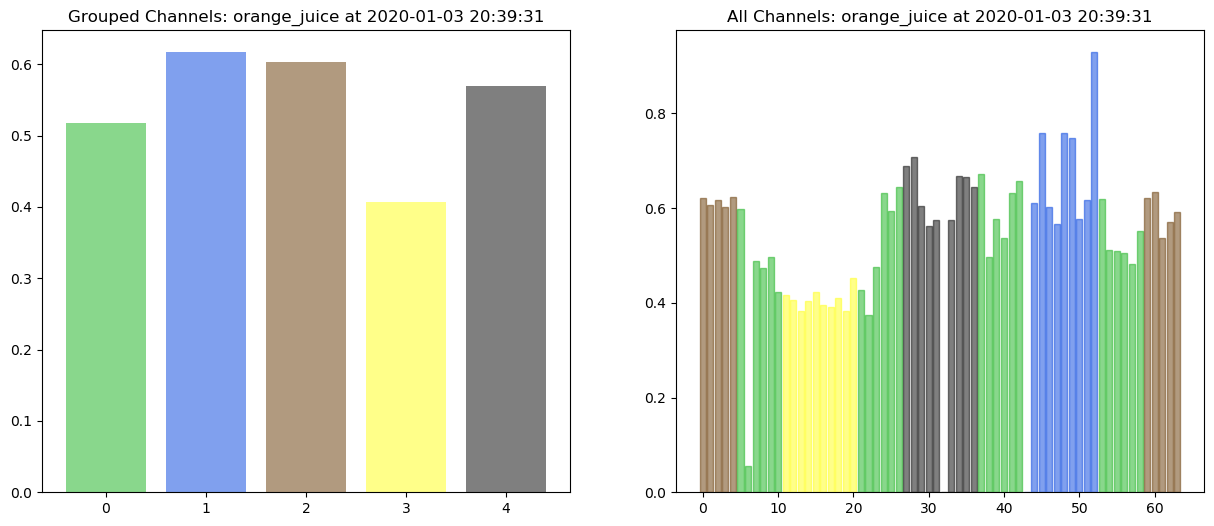

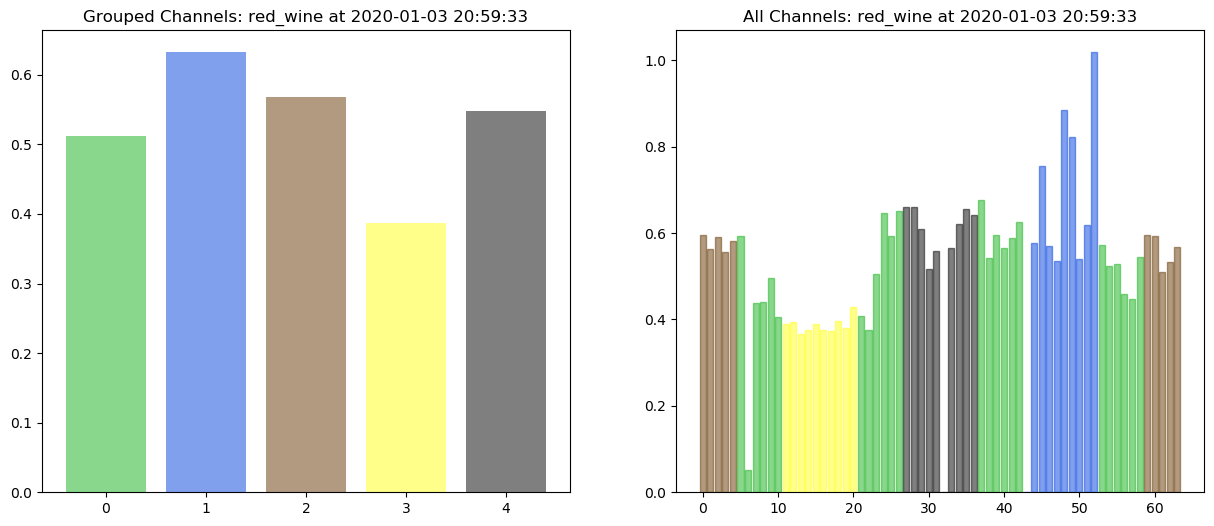

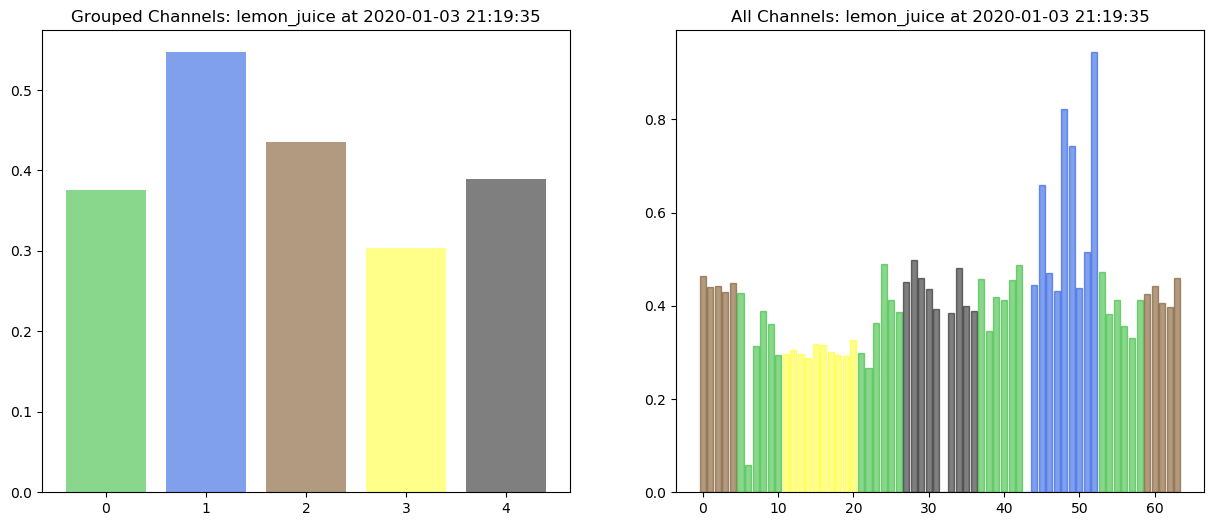

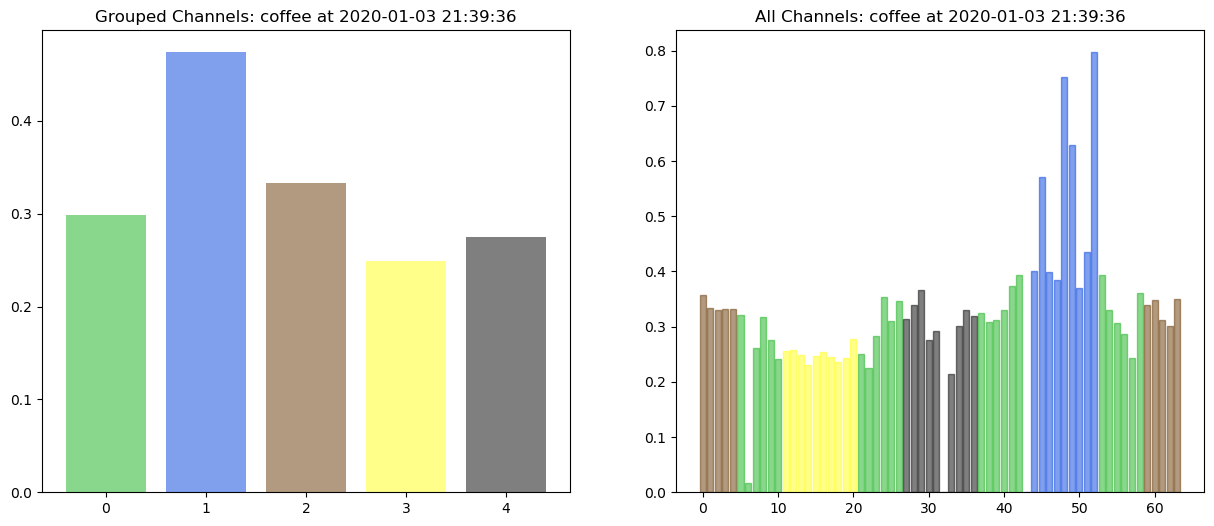

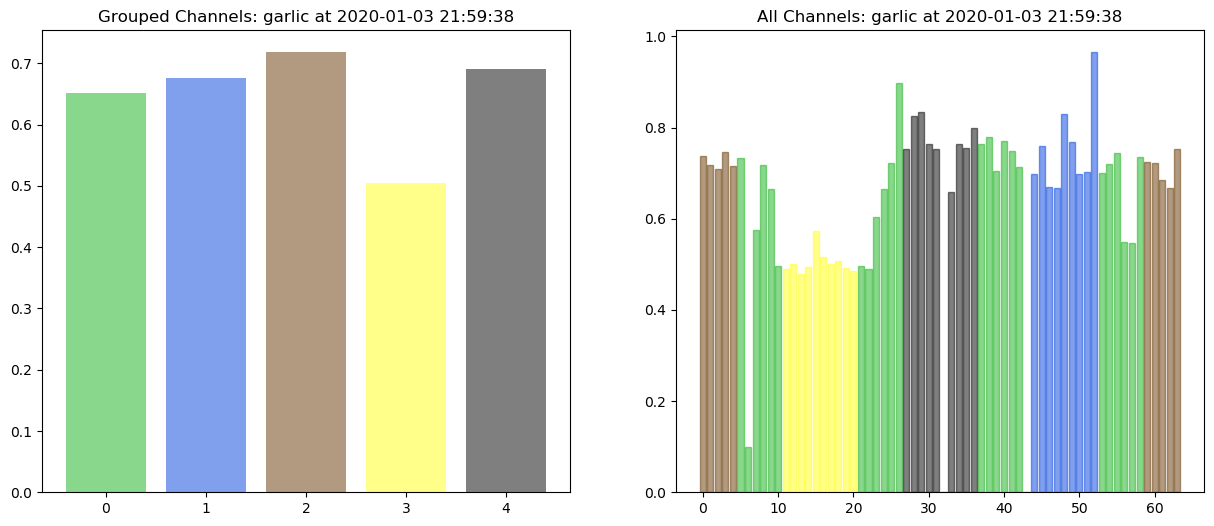

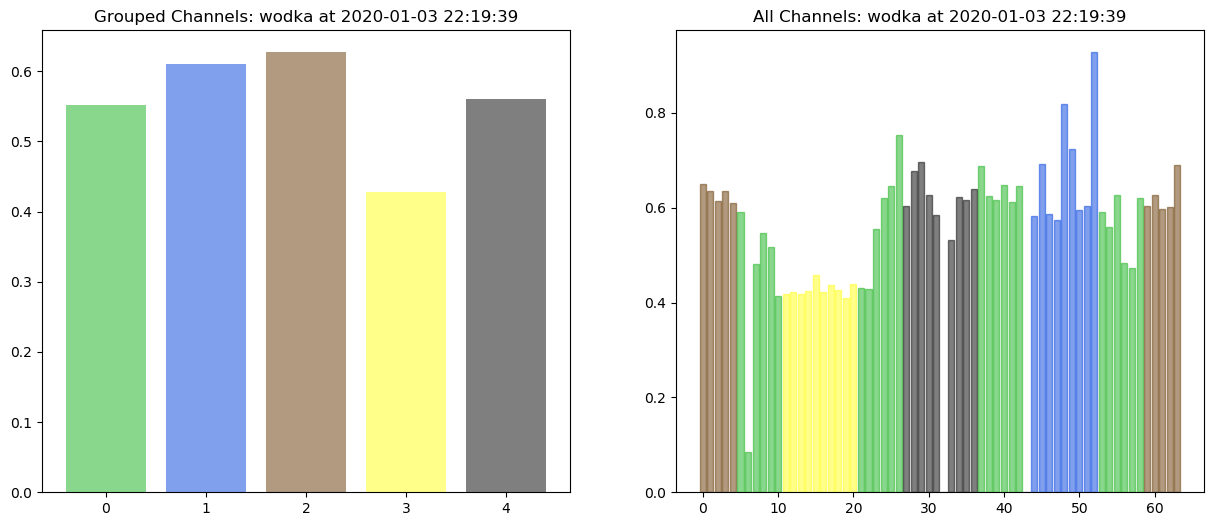

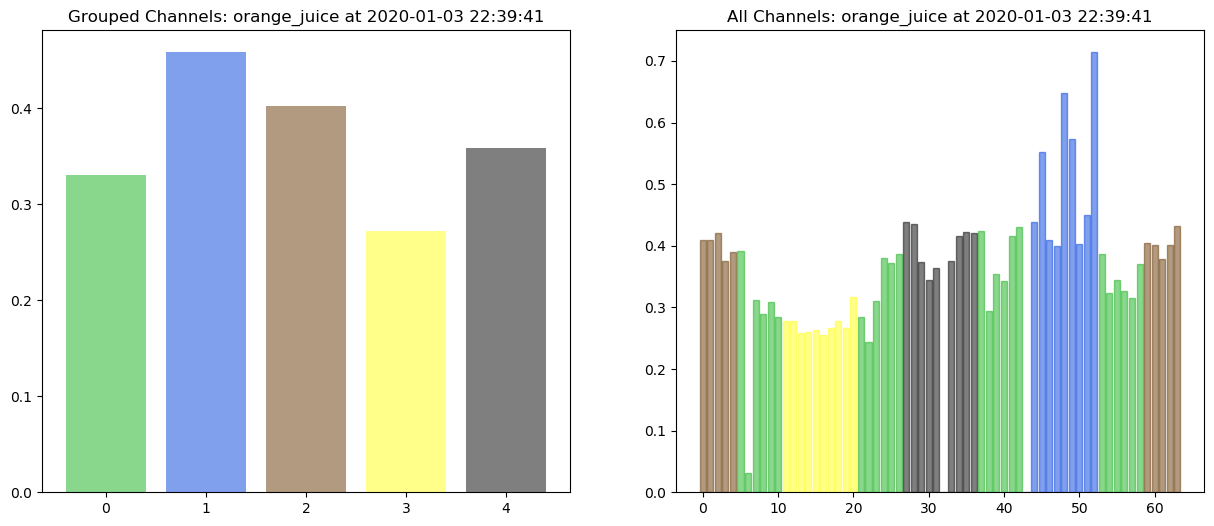

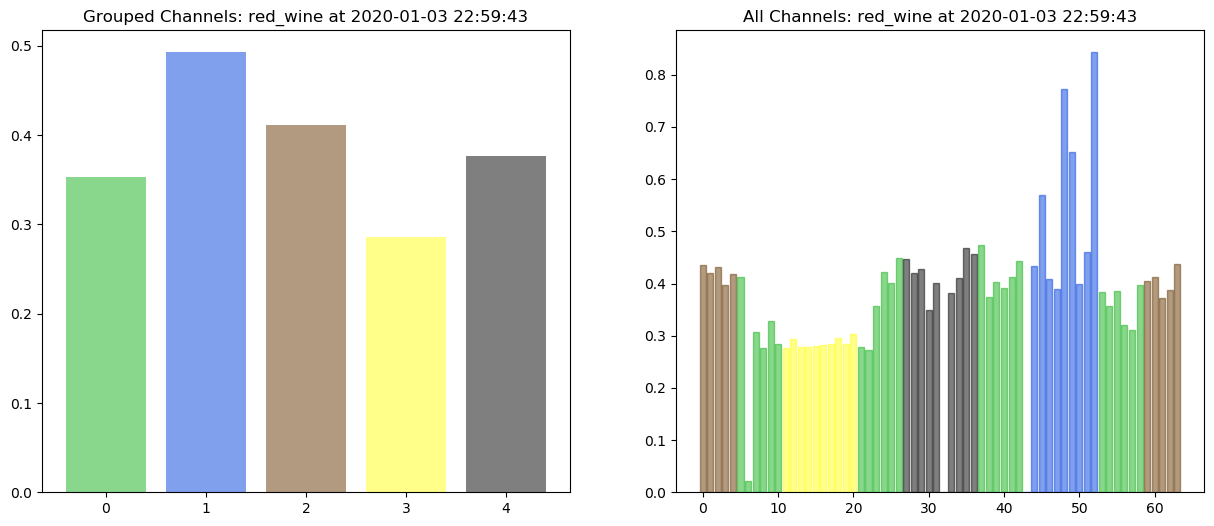

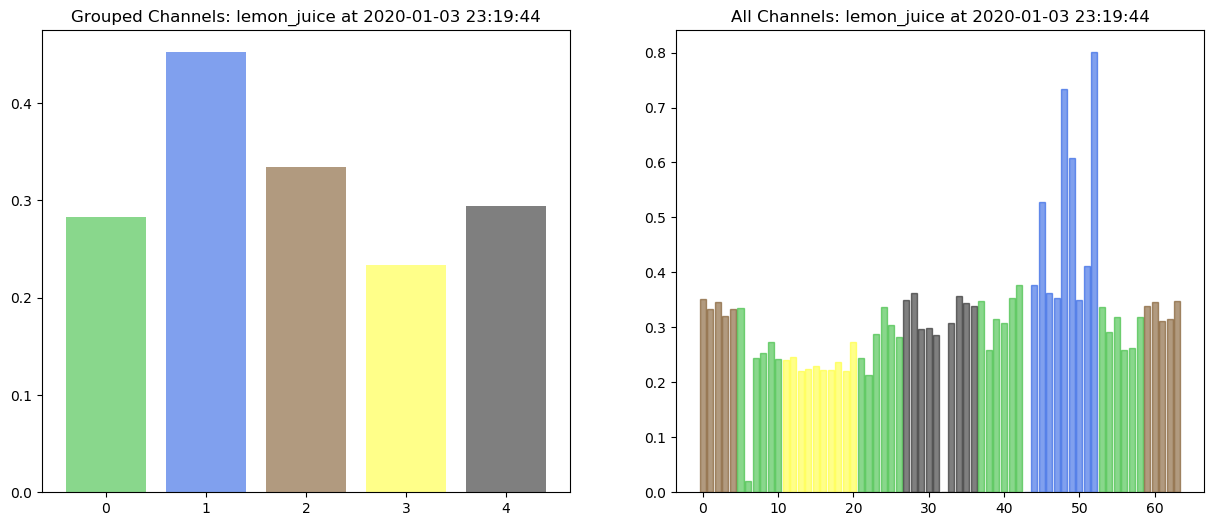

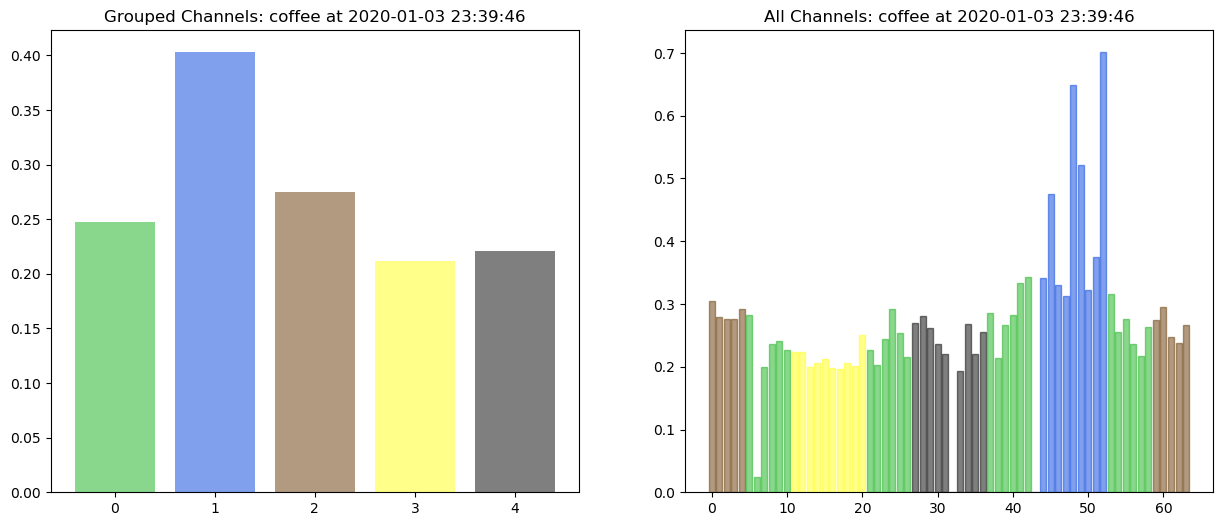

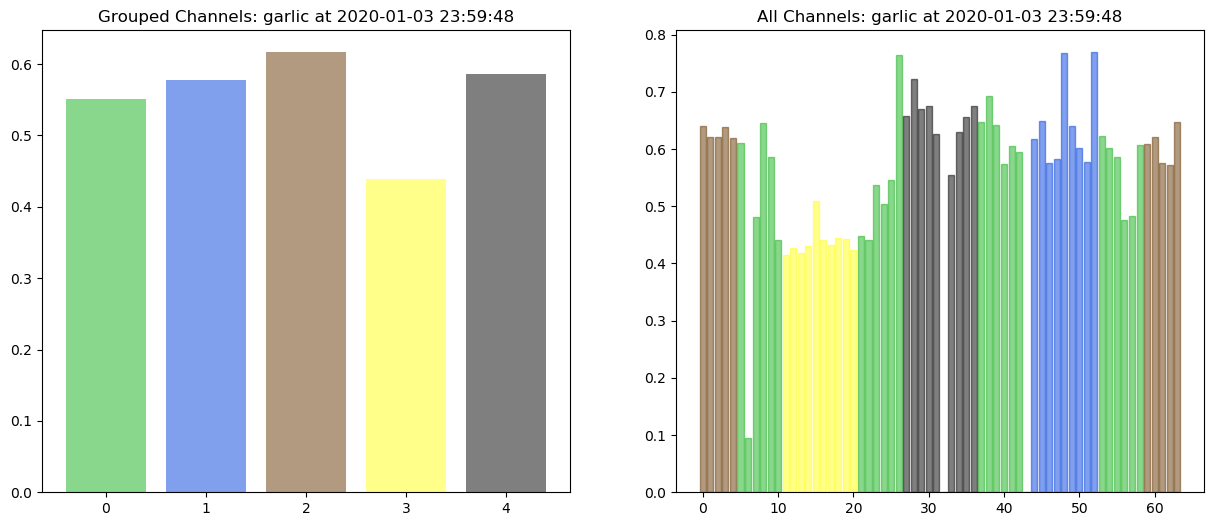

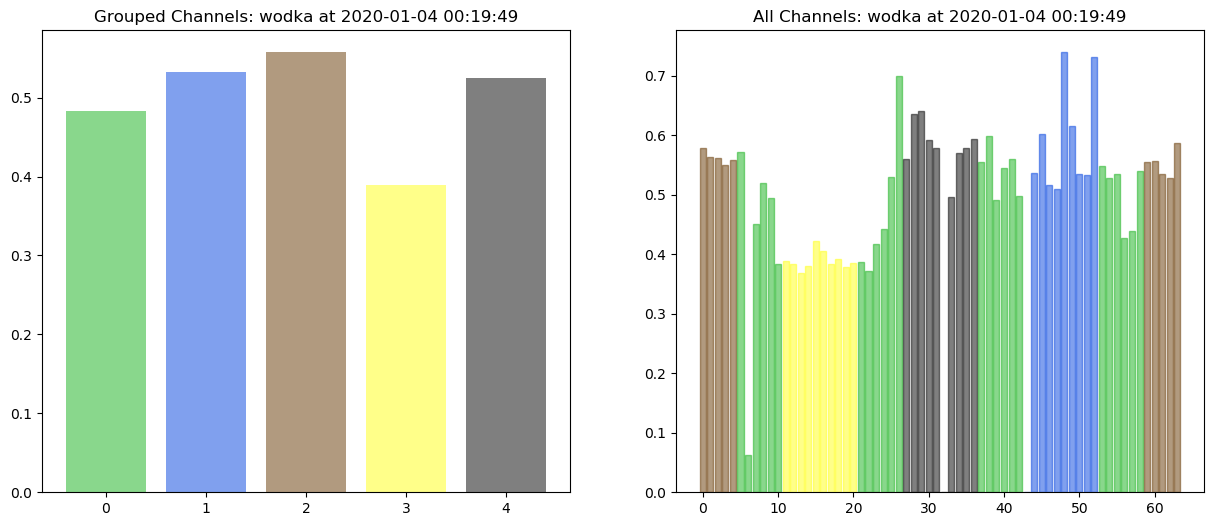

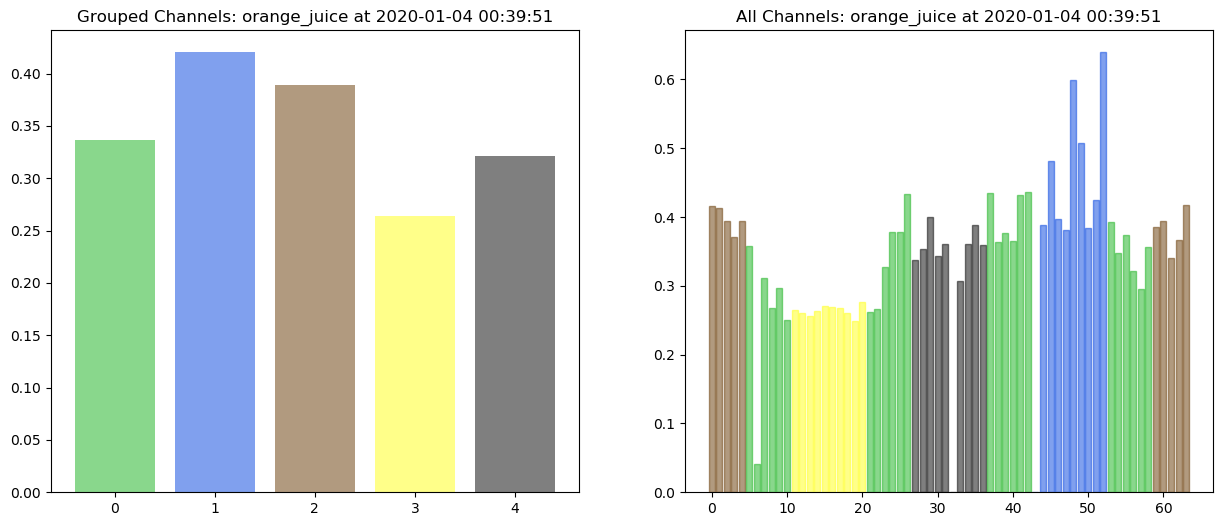

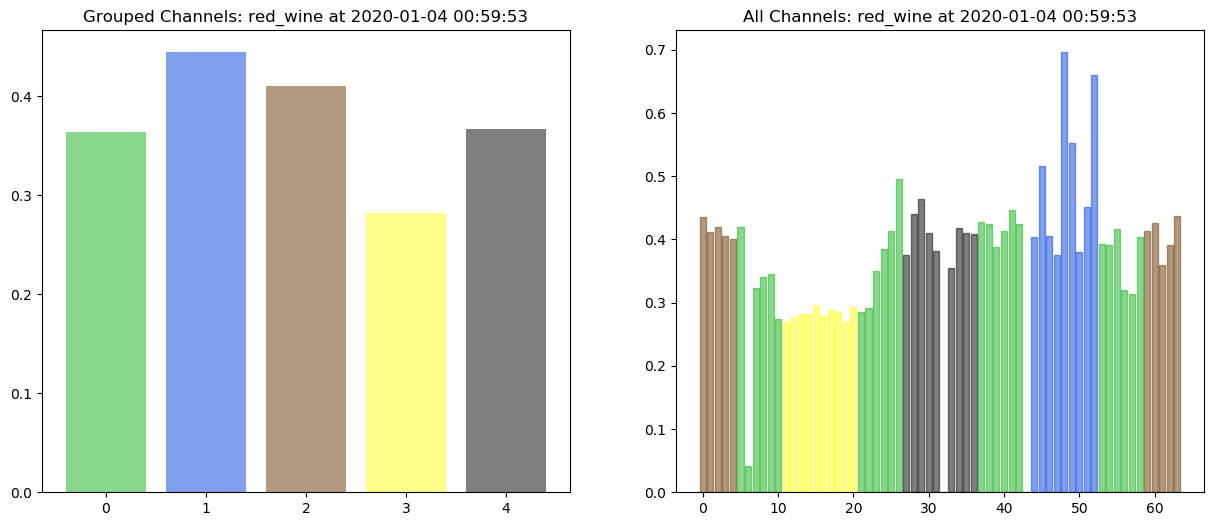

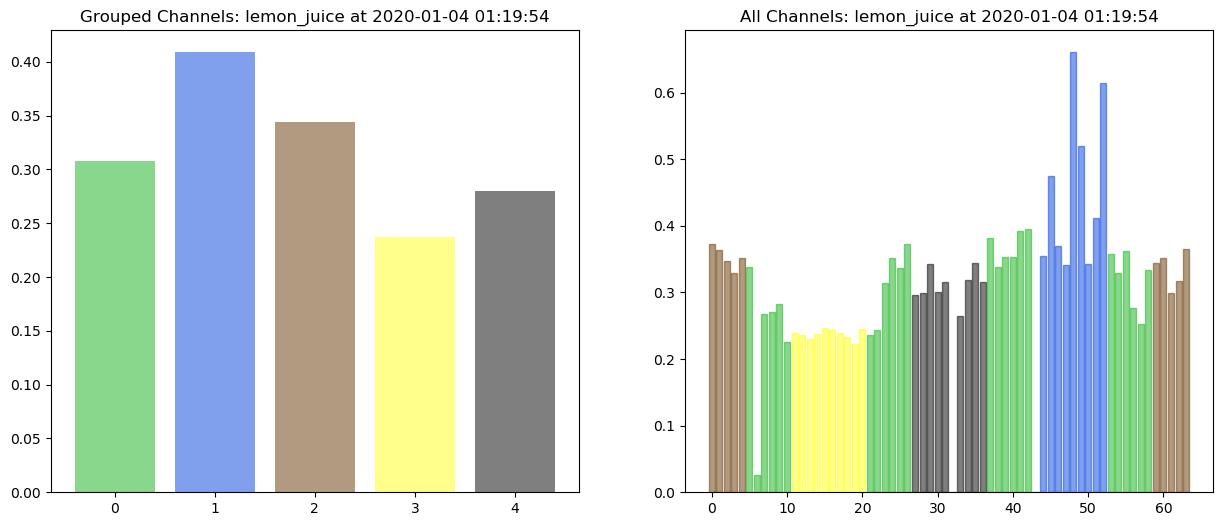

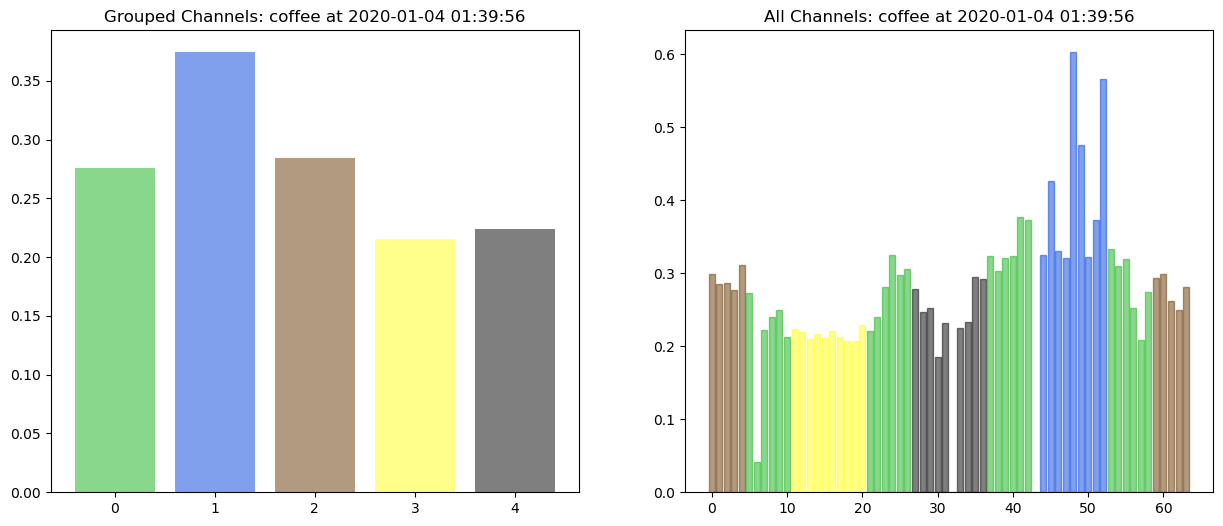

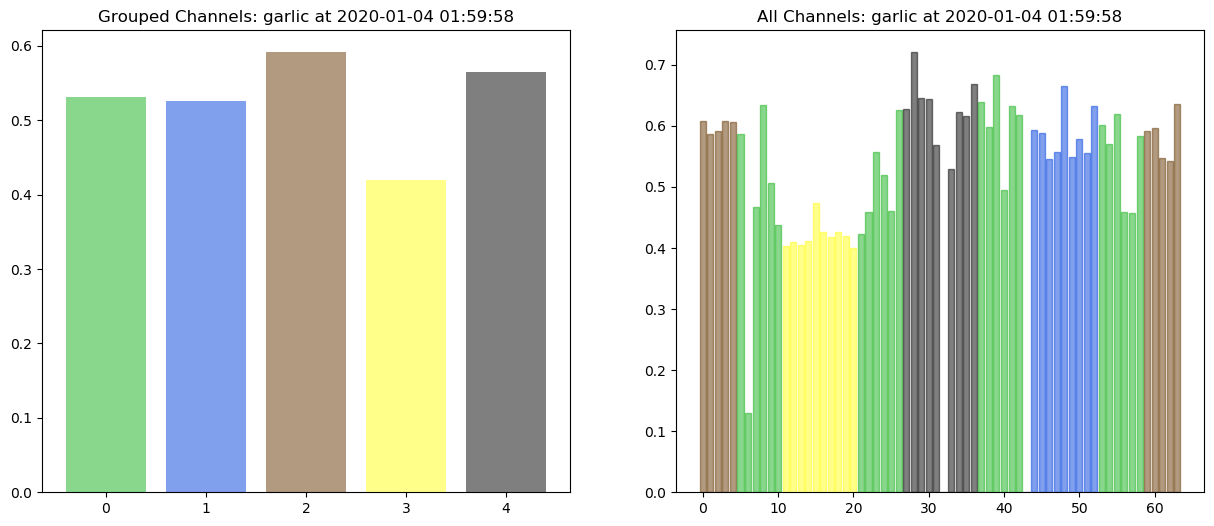

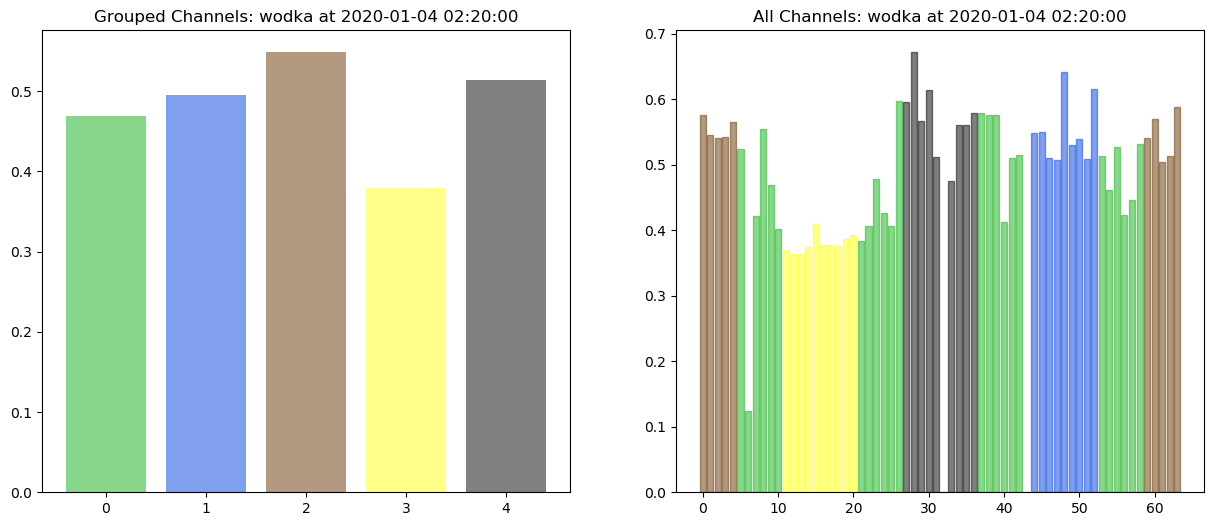

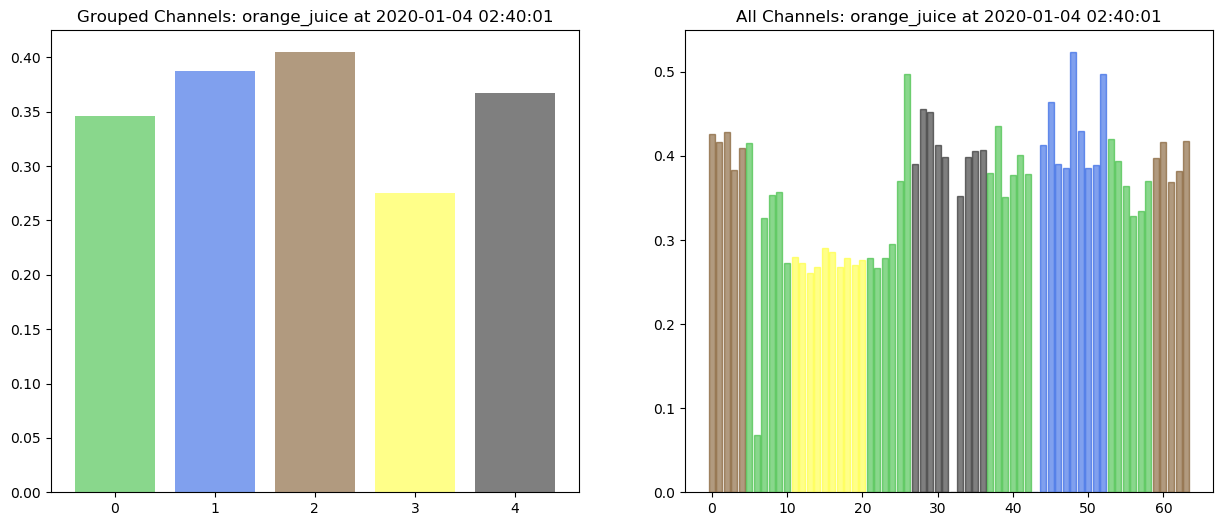

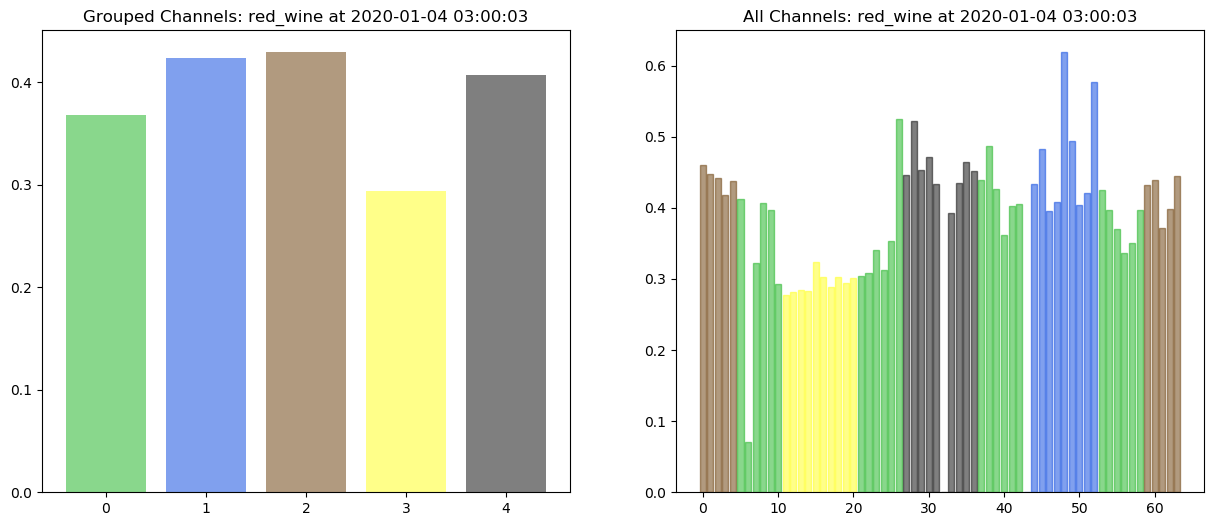

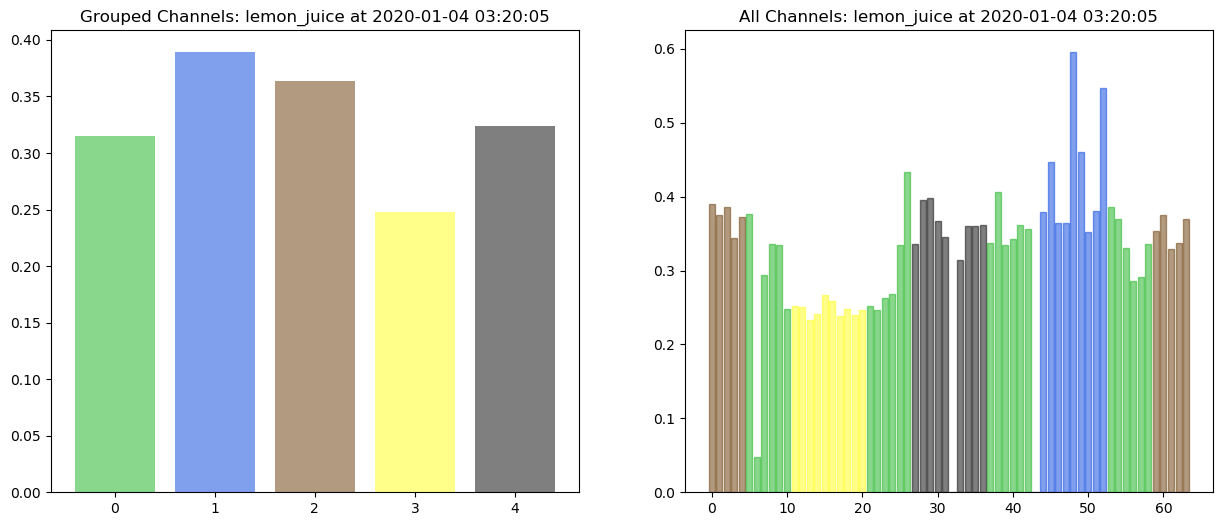

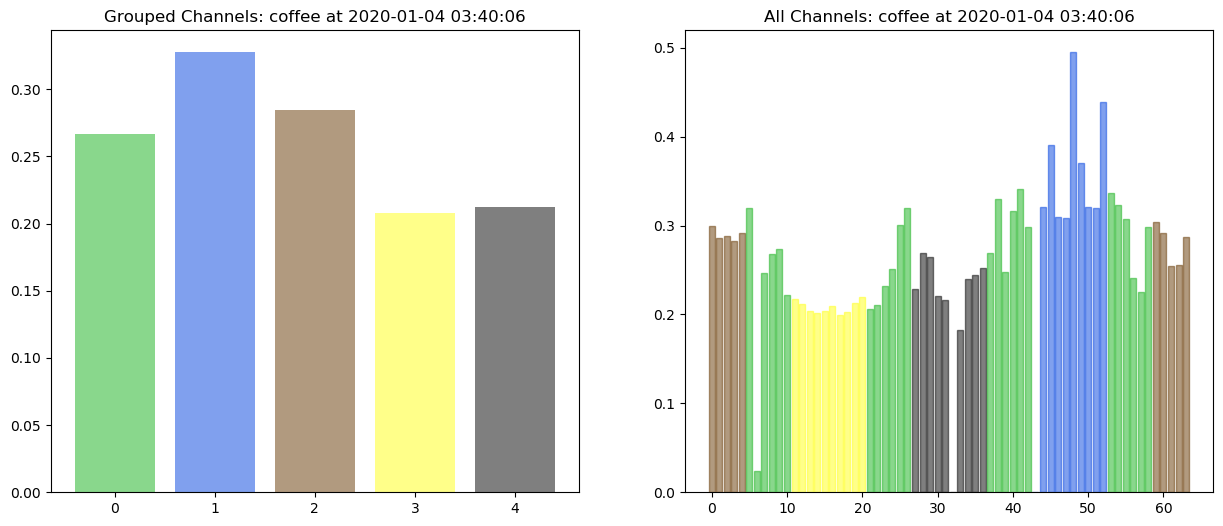

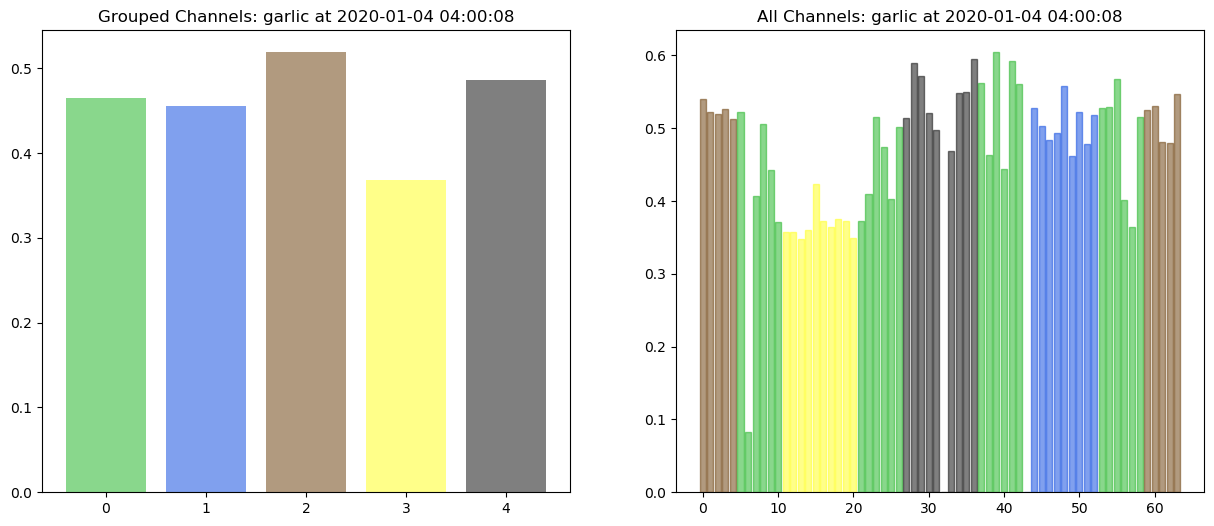

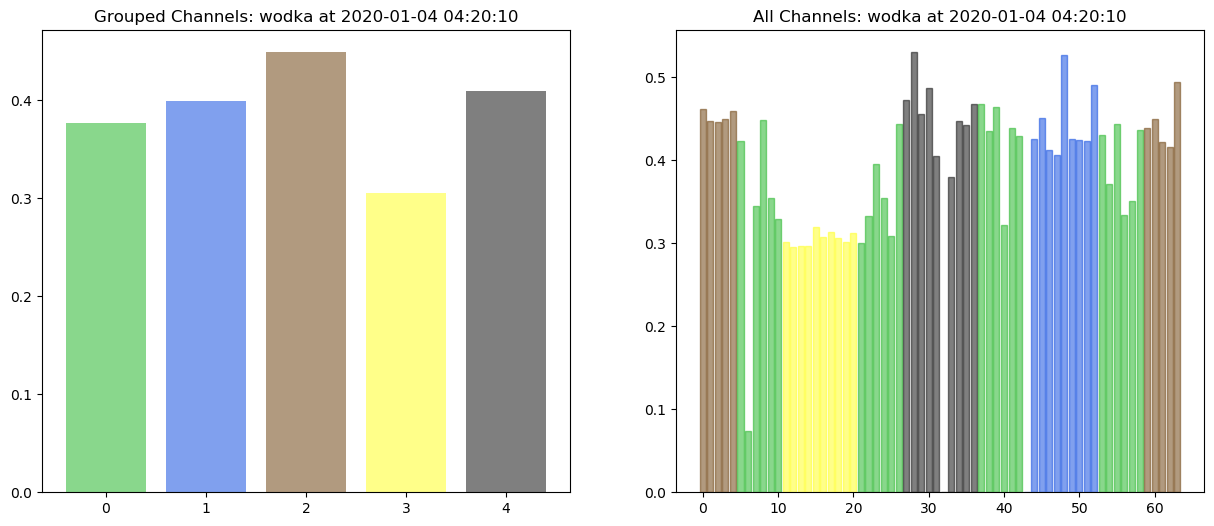

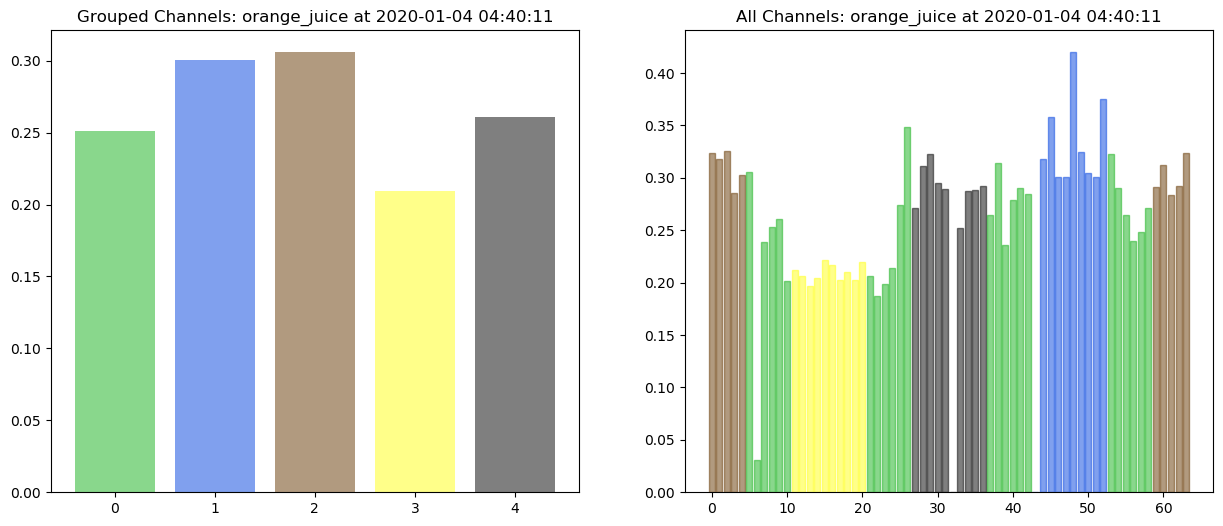

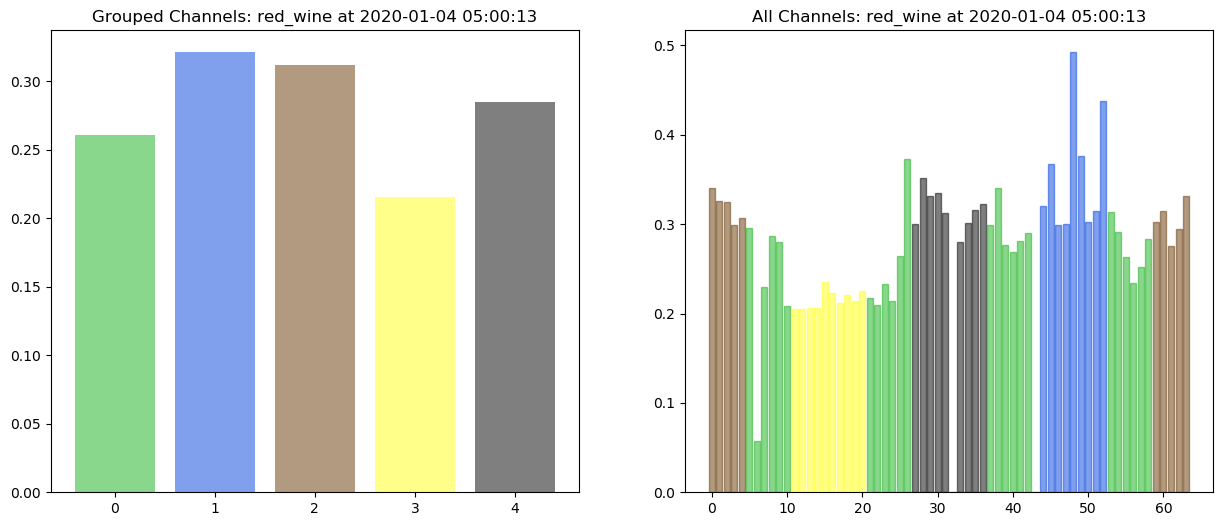

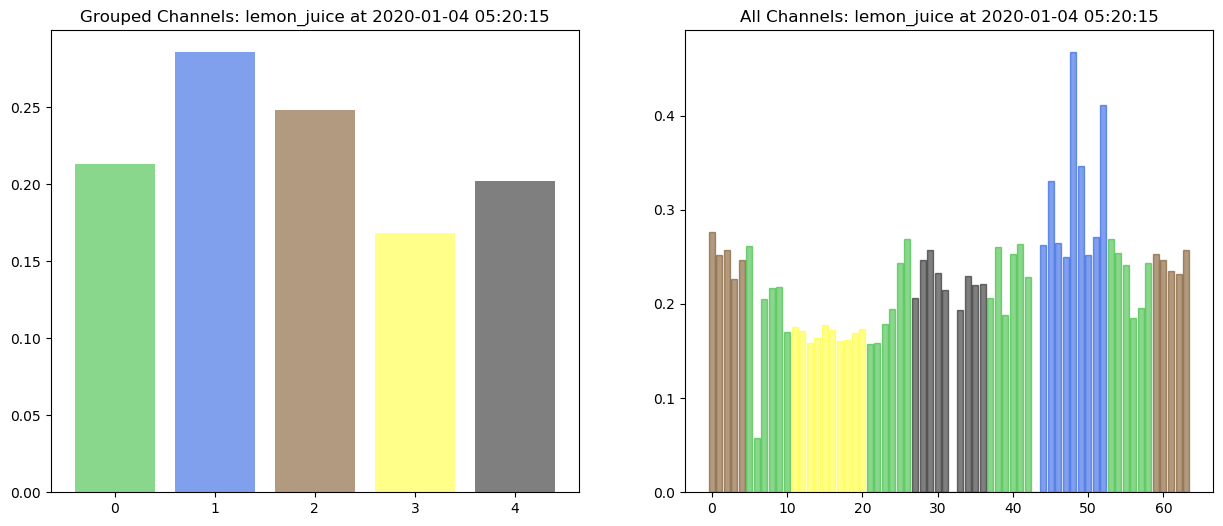

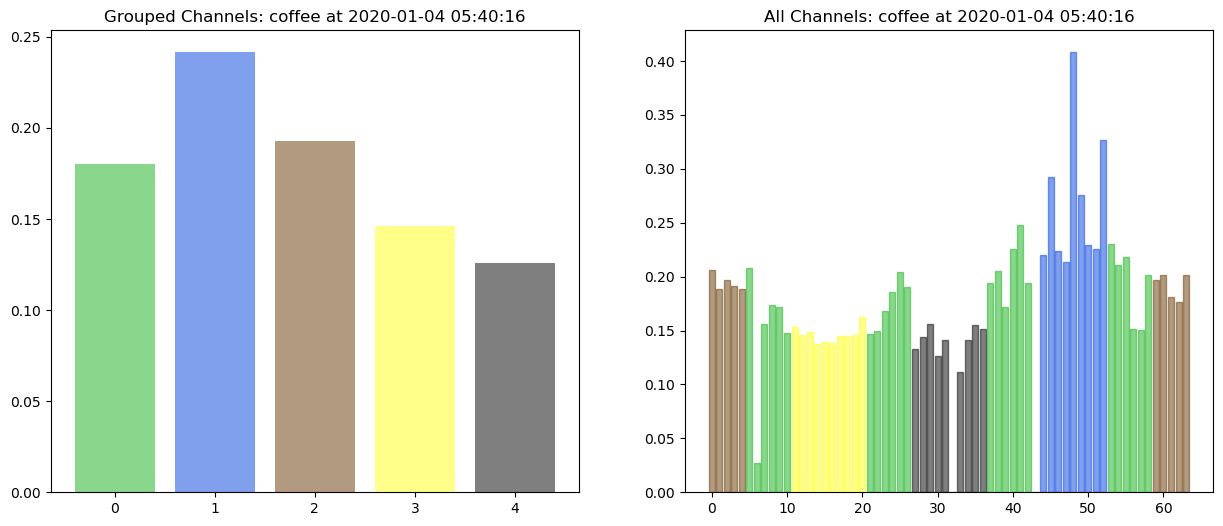

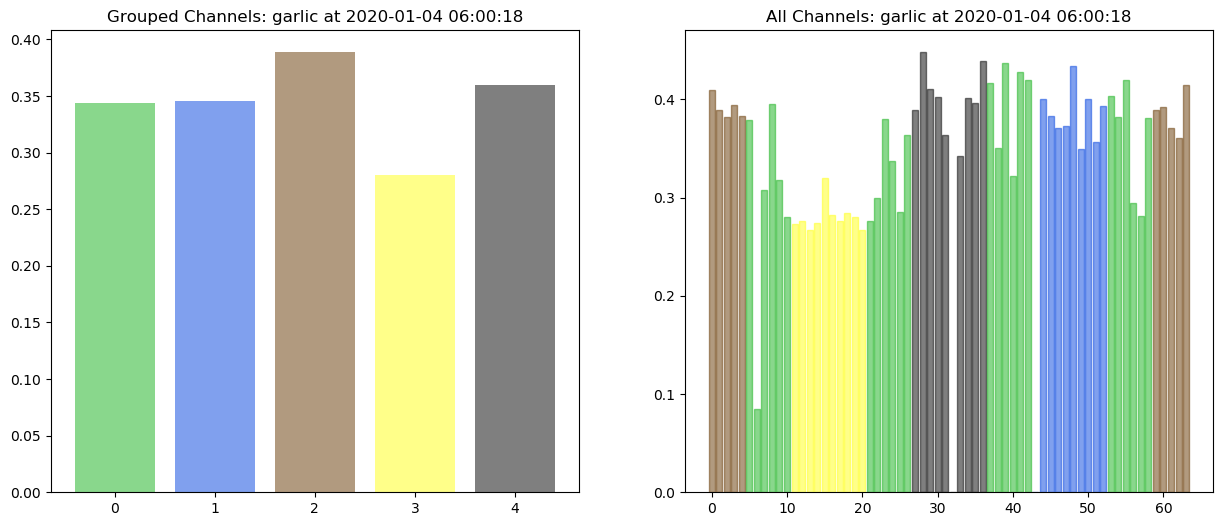

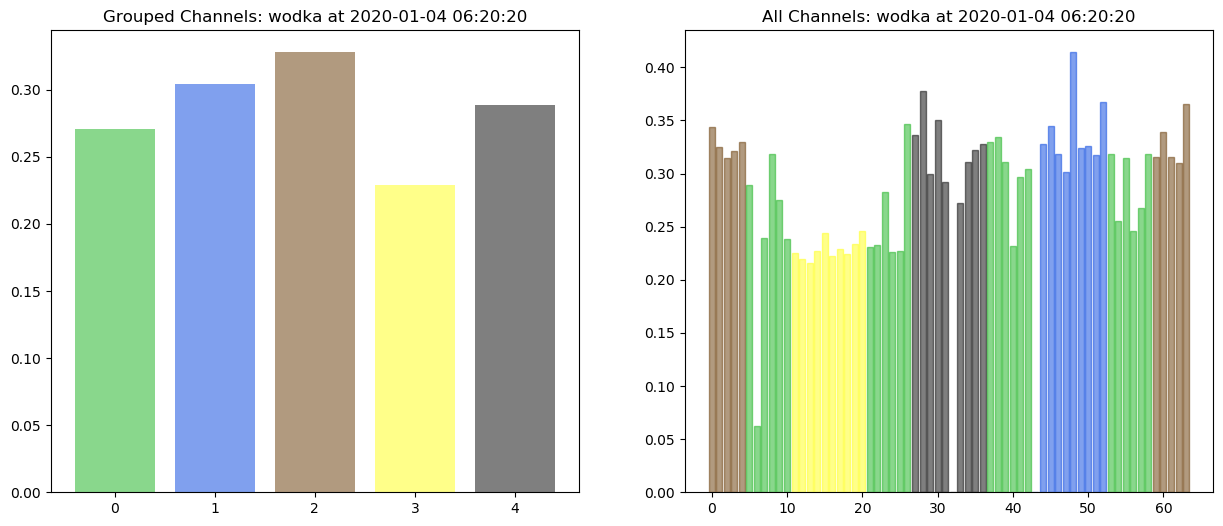

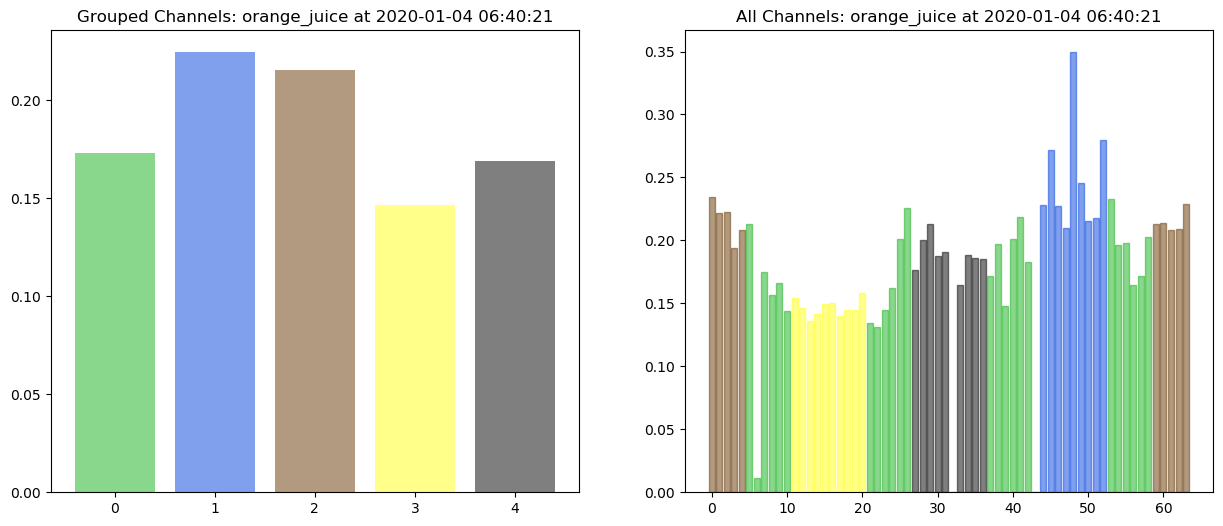

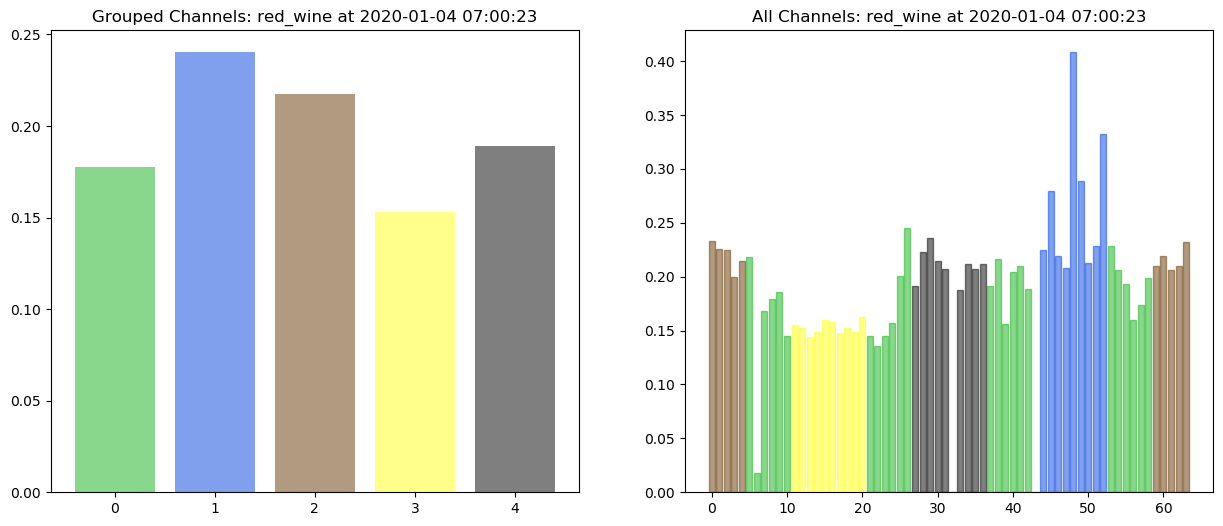

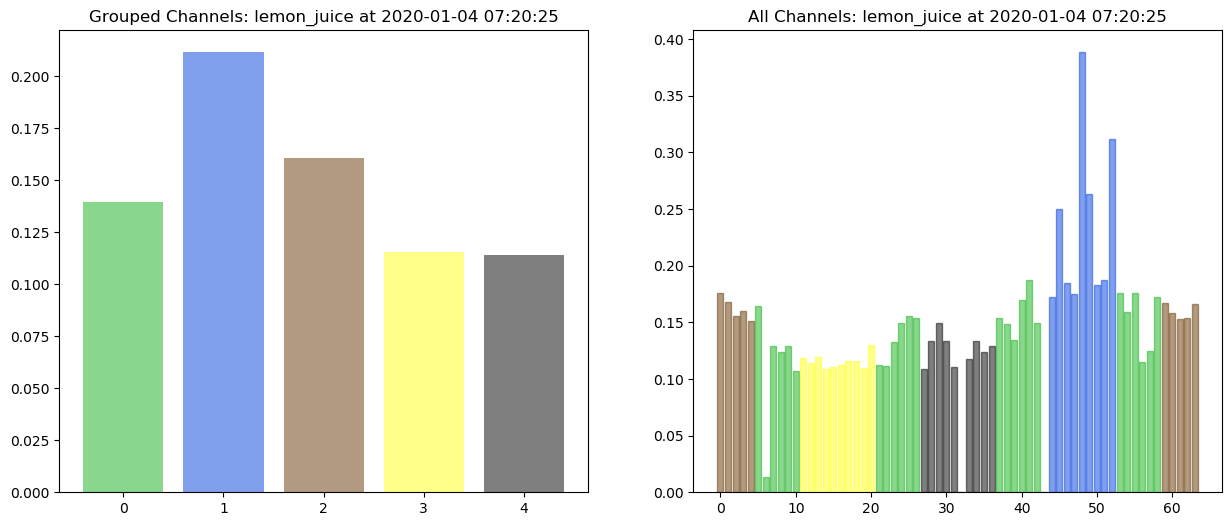

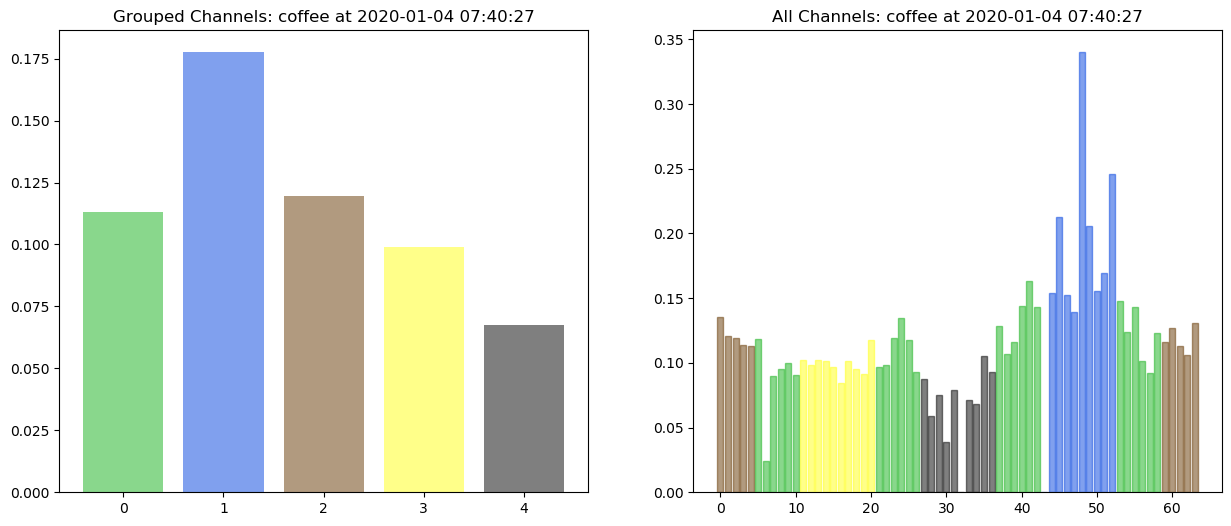

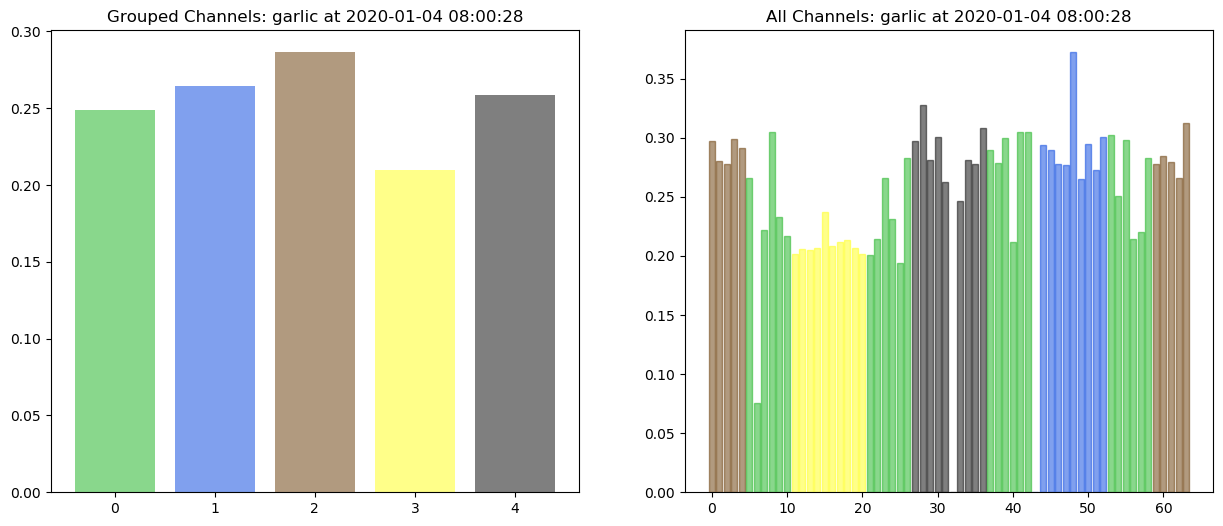

In [10]:
data_visualization.pretty_draw_meas(measurements, functionalisations, None, show_all_channels=True)

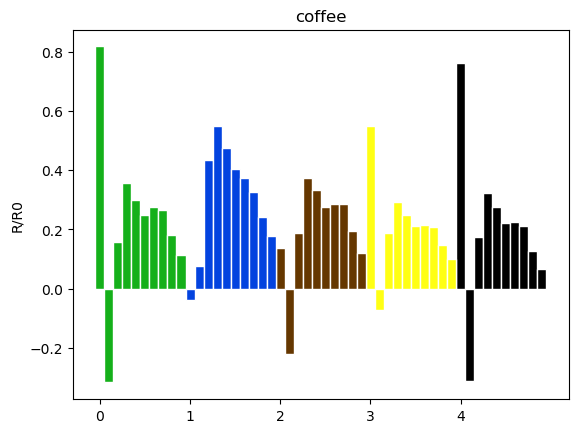

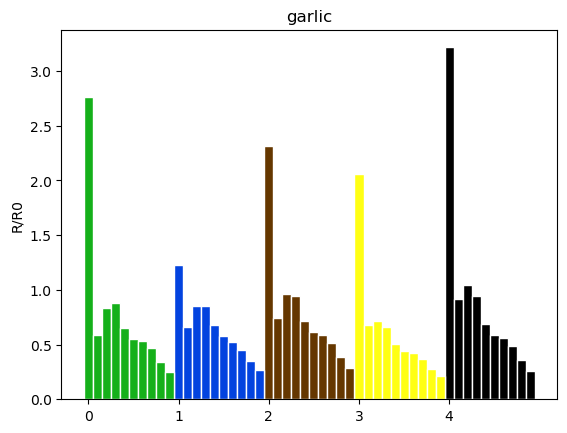

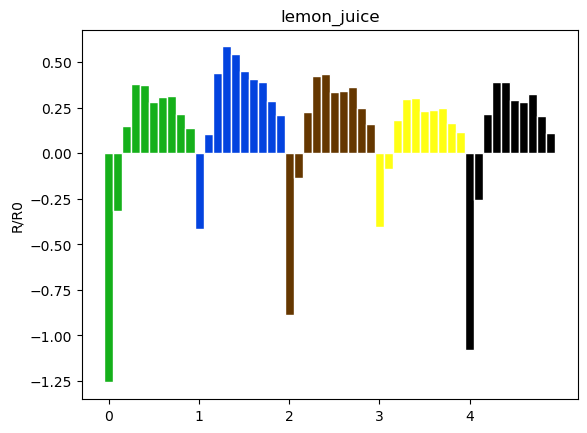

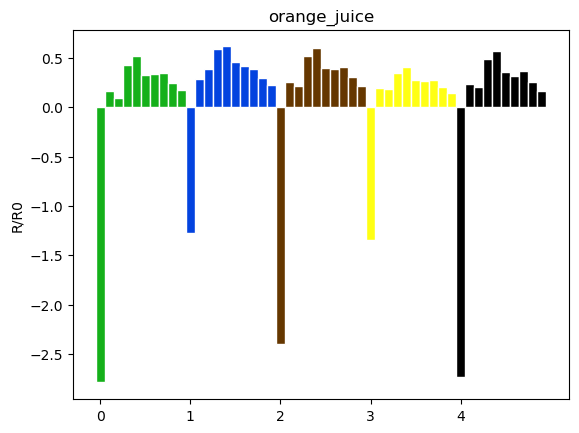

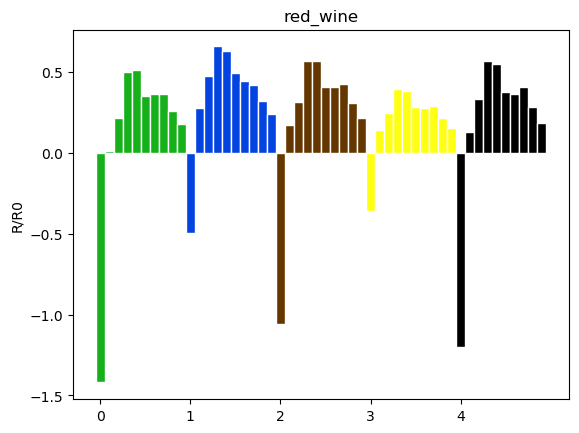

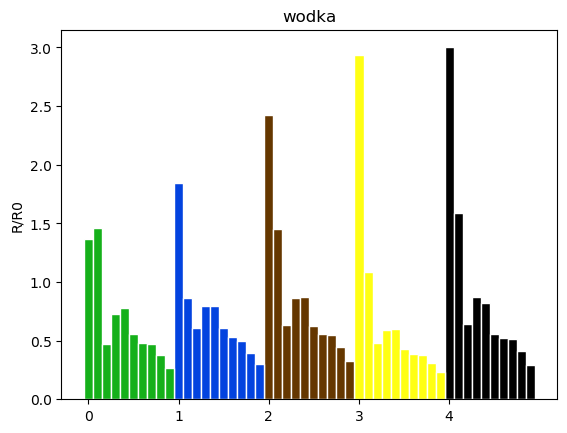

In [11]:
data_visualization.pretty_draw_direct_comp(measurements, functionalisations)

[-0.175  0.825  1.825  2.825  3.825]


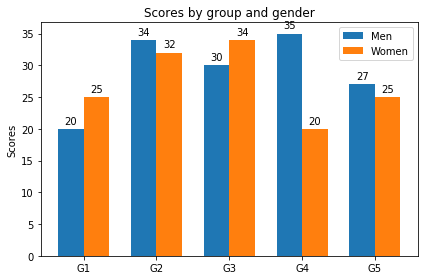

In [24]:
labels = ['G1', 'G2', 'G3', 'G4', 'G5']
men_means = [20, 34, 30, 35, 27]
women_means = [25, 32, 34, 20, 25]

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
print(x - width/2)
rects1 = ax.bar(x - width/2, men_means, width, label='Men')
rects2 = ax.bar(x + width/2, women_means, width, label='Women')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Scores')
ax.set_title('Scores by group and gender')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()


def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')


autolabel(rects1)
autolabel(rects2)

fig.tight_layout()

plt.show()

# PCA

In [25]:
all_the_data_array = None
all_variances = None

count = 0

for ts in measurements:
    if all_the_data_array is None:
        all_the_data_array = measurements[ts]['data']
    else: 
        all_the_data_array = np.vstack((all_the_data_array, measurements[ts]['data']))
        
    #do PCA for every single measurement
    pca_single = PCA(15)
    pca_single.fit_transform(measurements[ts]['data'])
    explained_variance = pca_single.explained_variance_ratio_
    count += 1
    if all_variances is None:
        all_variances = explained_variance
    else:
        all_variances = np.vstack((all_variances, explained_variance))
        

var=np.cumsum(np.round(np.mean(all_variances,axis=0), decimals=3)*100)
plt.ylabel('% Variance Explained')
plt.xlabel('# of Features')

plt.title('PCA Analysis')
plt.ylim(70,100.5)

plt.xticks(range(15))

plt.plot(var, label='averaged')

pca = PCA(15)
pca.fit_transform(all_the_data_array)
explained_variance = pca.explained_variance_ratio_

var=np.cumsum(np.round(explained_variance, decimals=3)*100)
plt.plot(var, label='all')
for i in range(15):
    plt.axvline(x=i, alpha=0.2, color="grey")

plt.legend()
plt.show()

NameError: name 'measurements' is not defined

In [ ]:
pca = PCA(3)
pca.fit_transform(all_the_data_array)

fig = plt.figure()
ax = Axes3D(fig)

measurements_grouped_by_label = {}
colors = ['xkcd:green','xkcd:blue','xkcd:brown','xkcd:yellow','xkcd:black','xkcd:grey','xkcd:violet','xkcd:orange','xkcd:red']

groups = np.unique(functionalisations)
y_pos = np.arange(len(groups))

for ts in measurements:
    if measurements[ts]['label'] not in measurements_grouped_by_label:
        measurements_grouped_by_label[measurements[ts]['label']] = {}
    measurements_grouped_by_label[measurements[ts]['label']][ts] = measurements[ts]

count = 0
for label in measurements_grouped_by_label:
    xs = []
    ys = []
    zs = []
    
    for ts in measurements_grouped_by_label[label]:
        tmp = pca.transform(measurements_grouped_by_label[label][ts]['avgs'].reshape(1, -1))
        x,y,z = tmp[0]
        xs.append(x)
        ys.append(y)
        zs.append(z)
    
    ax.scatter(xs, ys, zs, color=colors[count], label=label)
    count+=1
    
plt.legend()
plt.show()
      

In [ ]:
pca = PCA(2)
pca.fit_transform(all_the_data_array)

fig, ax = plt.subplots()

measurements_grouped_by_label = {}
colors = ['xkcd:green','xkcd:blue','xkcd:brown','xkcd:yellow','xkcd:black','xkcd:grey','xkcd:violet','xkcd:orange','xkcd:red']

groups = np.unique(functionalisations)
y_pos = np.arange(len(groups))

for ts in measurements:
    if measurements[ts]['label'] not in measurements_grouped_by_label:
        measurements_grouped_by_label[measurements[ts]['label']] = {}
    measurements_grouped_by_label[measurements[ts]['label']][ts] = measurements[ts]

count = 0
for label in measurements_grouped_by_label:
    xs = []
    ys = []
    
    for ts in measurements_grouped_by_label[label]:
        tmp = pca.transform(measurements_grouped_by_label[label][ts]['avgs'].reshape(1, -1))
        x,y = tmp[0]
        xs.append(x)
        ys.append(y)
    
    ax.scatter(xs, ys, color=colors[count], label=label)
    count+=1
    
plt.legend()
plt.show()

# tSNE